# Visualization of Stock Trading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import datetime
import pandas_datareader.data as web


import matplotlib.pyplot as plt

import logging
import coloredlogs

from train import *
from evaluate import show_eval_result

# Altair:
# in case of error on notebook: Istll vega_datasets
#conda install -c conda-forge altair vega_datasets notebook vega
#see also https://altair-viz.github.io/getting_started/installation.html
alt.renderers.enable('notebook')

Using TensorFlow backend.


[[0.5        0.5        0.5        0.5        0.00247262 0.99330715]]
(1, 6)


RendererRegistry.enable('notebook')

## Set relevant parameters
 - Window-Size: cutout of stock data that agent gets as state for his decision making
 - ep_count: # of epochs
 - Model Name (hint: model saved automatically after 10 epochs)
 - Pretrained: Load Pretrained Model or create new one

In [2]:
window_size = 30
batch_size = 20 #16
ep_count = 100 # 3-5 for debugging, otherwise 20-100
model_name = 'model_w30v1'
pretrained = False
debug = False

## Load Datasets into pandas DataFrame

<Figure size 432x288 with 0 Axes>

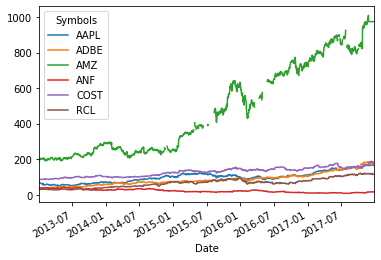

In [3]:
# Loading Train Data
# Setting Start and Enddate for Validation

start_train= datetime.datetime(2013, 1, 1)
end_train = datetime.datetime(2018, 1, 1)
start_val = end_train
end_val = datetime.datetime.now()


# Load Test Data

# Load several stocks
df_train = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF','AMZ'],'yahoo',
                               start=start_train, end=end_train)['Adj Close']

df2_train = web.DataReader('GOLD','yahoo',
                               start=start_train, #start_train
                               end=end_train) #end_train


df_val = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF','AMZ'],'yahoo',
                               start=start_val, #start_train
                               end=end_val)['Adj Close'] #end_val
df2_val = web.DataReader('GOLD','yahoo',
                               start=start_val, #start_val
                               end=end_val)  #end_val


# Convert df2_test to list
df2_train_list = list(df2_train['Adj Close'])
df2_val_list = list(df2_val['Adj Close'])

plt.figure();
df_train.plot();

## Training of Model
 - List of stocks (loaded above) is shuffled in every epoch

I1006 09:02:40.639282 17276 train.py:156] switching to TensorFlow for CPU
2019-10-06 09:02:40 PC-Stefan root[17272] DEBUG switching to TensorFlow for CPU
W1006 09:02:40.748315 17276 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2019-10-06 09:02:40 PC-Stefan tensorflow[17272] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 09:02:40.756307 17276 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

2019-10-06 09:02:40 PC-Stefan tensorflow[17272] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site

Symbols          ADBE        AMZ       AAPL        RCL         ANF       COST
Date                                                                         
2013-01-02  30.555111  87.683083  37.134563  69.057251  192.800003  38.340000
2013-01-03  30.900450  88.581963  36.783211  68.185600  197.550003  37.750000
2013-01-04  30.900450  88.296738  37.017441  66.286301  198.350006  38.130001
2013-01-07  30.745050  87.613922  37.001835  65.896370  204.500000  37.939999
2013-01-08  30.408323  87.449738  37.220459  66.073723  202.550003  38.139999


Episode 1/100:   0%|          | 0/1258 [00:00<?, ?it/s]W1006 09:02:40.882335 17276 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2019-10-06 09:02:40 PC-Stefan tensorflow[17272] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1006 09:02:40.889337 17276 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

2019-10-06 09:02:40 PC-Stefan tensorflow[17272] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.

Symbols           AMZ       ADBE        ANF        AAPL       COST        RCL
Date                                                                         
2013-01-02  37.134563  38.340000  69.057251  192.800003  87.683083  30.555111
2013-01-03  36.783211  37.750000  68.185600  197.550003  88.581963  30.900450
2013-01-04  37.017441  38.130001  66.286301  198.350006  88.296738  30.900450
2013-01-07  37.001835  37.939999  65.896370  204.500000  87.613922  30.745050
2013-01-08  37.220459  38.139999  66.073723  202.550003  87.449738  30.408323


Episode 2/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.32it/s]
I1006 09:04:24.324123 17276 train.py:144] Episode 2/100 - Train Position: -$4.00  Val Position: USELESS  Train Loss: nan  (~14.4076 secs)
2019-10-06 09:04:24 PC-Stefan root[17272] INFO Episode 2/100 - Train Position: -$4.00  Val Position: USELESS  Train Loss: nan  (~14.4076 secs)
Episode 2/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.50it/s]
I1006 09:04:38.836600 17276 train.py:144] Episode 2/100 - Train Position: +$12.51  Val Position: USELESS  Train Loss: nan  (~14.3780 secs)
2019-10-06 09:04:38 PC-Stefan root[17272] INFO Episode 2/100 - Train Position: +$12.51  Val Position: USELESS  Train Loss: nan  (~14.3780 secs)
Episode 2/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.02it/s]
I1006 09:04:53.603536 17276 train.py:144] Episode 2/100 - Train Position: +$76.46  Val Position: USELESS  Train Loss: nan  (~14.6268 secs)
2019-10-06 09:04:53 PC-Stefan root[17272] INFO Episode 2/100 - Train Position: +$76.46  Val Posi

Symbols          AAPL       ADBE        AMZ        ANF       COST         RCL
Date                                                                         
2013-01-02  87.683083  38.340000  30.555111  37.134563  69.057251  192.800003
2013-01-03  88.581963  37.750000  30.900450  36.783211  68.185600  197.550003
2013-01-04  88.296738  38.130001  30.900450  37.017441  66.286301  198.350006
2013-01-07  87.613922  37.939999  30.745050  37.001835  65.896370  204.500000
2013-01-08  87.449738  38.139999  30.408323  37.220459  66.073723  202.550003


Episode 3/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.77it/s]
I1006 09:05:52.818634 17276 train.py:144] Episode 3/100 - Train Position: +$22.13  Val Position: USELESS  Train Loss: nan  (~14.6684 secs)
2019-10-06 09:05:52 PC-Stefan root[17272] INFO Episode 3/100 - Train Position: +$22.13  Val Position: USELESS  Train Loss: nan  (~14.6684 secs)
Episode 3/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.50it/s]
I1006 09:06:07.680037 17276 train.py:144] Episode 3/100 - Train Position: +$193.90  Val Position: USELESS  Train Loss: nan  (~14.7148 secs)
2019-10-06 09:06:07 PC-Stefan root[17272] INFO Episode 3/100 - Train Position: +$193.90  Val Position: USELESS  Train Loss: nan  (~14.7148 secs)
Episode 3/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.38it/s]
I1006 09:06:22.387348 17276 train.py:144] Episode 3/100 - Train Position: +$76.99  Val Position: USELESS  Train Loss: nan  (~14.5658 secs)
2019-10-06 09:06:22 PC-Stefan root[17272] INFO Episode 3/100 - Train Position: +$76.99  Val 

Symbols           ADBE       COST        RCL        ANF        AMZ       AAPL
Date                                                                         
2013-01-02  192.800003  30.555111  38.340000  37.134563  69.057251  87.683083
2013-01-03  197.550003  30.900450  37.750000  36.783211  68.185600  88.581963
2013-01-04  198.350006  30.900450  38.130001  37.017441  66.286301  88.296738
2013-01-07  204.500000  30.745050  37.939999  37.001835  65.896370  87.613922
2013-01-08  202.550003  30.408323  38.139999  37.220459  66.073723  87.449738


Episode 4/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.52it/s]
I1006 09:07:21.274865 17276 train.py:144] Episode 4/100 - Train Position: +$469.55  Val Position: USELESS  Train Loss: nan  (~14.5421 secs)
2019-10-06 09:07:21 PC-Stefan root[17272] INFO Episode 4/100 - Train Position: +$469.55  Val Position: USELESS  Train Loss: nan  (~14.5421 secs)
Episode 4/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.83it/s]
I1006 09:07:36.797367 17276 train.py:144] Episode 4/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.3754 secs)
2019-10-06 09:07:36 PC-Stefan root[17272] INFO Episode 4/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.3754 secs)
Episode 4/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.62it/s]
I1006 09:07:51.630696 17276 train.py:144] Episode 4/100 - Train Position: +$44.75  Val Position: USELESS  Train Loss: nan  (~14.6941 secs)
2019-10-06 09:07:51 PC-Stefan root[17272] INFO Episode 4/100 - Train Position: +$44.75  Val Po

Symbols          AAPL       ADBE        AMZ        ANF       COST         RCL
Date                                                                         
2013-01-02  38.340000  69.057251  30.555111  87.683083  37.134563  192.800003
2013-01-03  37.750000  68.185600  30.900450  88.581963  36.783211  197.550003
2013-01-04  38.130001  66.286301  30.900450  88.296738  37.017441  198.350006
2013-01-07  37.939999  65.896370  30.745050  87.613922  37.001835  204.500000
2013-01-08  38.139999  66.073723  30.408323  87.449738  37.220459  202.550003


Episode 5/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.48it/s]
I1006 09:08:50.412887 17276 train.py:144] Episode 5/100 - Train Position: +$28.28  Val Position: USELESS  Train Loss: nan  (~14.5493 secs)
2019-10-06 09:08:50 PC-Stefan root[17272] INFO Episode 5/100 - Train Position: +$28.28  Val Position: USELESS  Train Loss: nan  (~14.5493 secs)
Episode 5/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.72it/s]
I1006 09:09:05.065176 17276 train.py:144] Episode 5/100 - Train Position: +$99.52  Val Position: USELESS  Train Loss: nan  (~14.5083 secs)
2019-10-06 09:09:05 PC-Stefan root[17272] INFO Episode 5/100 - Train Position: +$99.52  Val Position: USELESS  Train Loss: nan  (~14.5083 secs)
Episode 5/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.52it/s]
I1006 09:09:19.746482 17276 train.py:144] Episode 5/100 - Train Position: +$72.38  Val Position: USELESS  Train Loss: nan  (~14.5415 secs)
2019-10-06 09:09:19 PC-Stefan root[17272] INFO Episode 5/100 - Train Position: +$72.38  Val Po

Symbols          AAPL        ADBE        AMZ        ANF       COST        RCL
Date                                                                         
2013-01-02  87.683083  192.800003  38.340000  37.134563  69.057251  30.555111
2013-01-03  88.581963  197.550003  37.750000  36.783211  68.185600  30.900450
2013-01-04  88.296738  198.350006  38.130001  37.017441  66.286301  30.900450
2013-01-07  87.613922  204.500000  37.939999  37.001835  65.896370  30.745050
2013-01-08  87.449738  202.550003  38.139999  37.220459  66.073723  30.408323


Episode 6/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.54it/s]
I1006 09:10:18.848919 17276 train.py:144] Episode 6/100 - Train Position: -$0.37  Val Position: USELESS  Train Loss: nan  (~14.5376 secs)
2019-10-06 09:10:18 PC-Stefan root[17272] INFO Episode 6/100 - Train Position: -$0.37  Val Position: USELESS  Train Loss: nan  (~14.5376 secs)
Episode 6/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.42it/s]
I1006 09:10:33.547218 17276 train.py:144] Episode 6/100 - Train Position: +$629.05  Val Position: USELESS  Train Loss: nan  (~14.5586 secs)
2019-10-06 09:10:33 PC-Stefan root[17272] INFO Episode 6/100 - Train Position: +$629.05  Val Position: USELESS  Train Loss: nan  (~14.5586 secs)
Episode 6/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.37it/s]
I1006 09:10:48.255248 17276 train.py:144] Episode 6/100 - Train Position: +$9.54  Val Position: USELESS  Train Loss: nan  (~14.5662 secs)
2019-10-06 09:10:48 PC-Stefan root[17272] INFO Episode 6/100 - Train Position: +$9.54  Val Posi

Symbols           ADBE        AMZ       AAPL        ANF       COST        RCL
Date                                                                         
2013-01-02  192.800003  69.057251  38.340000  30.555111  87.683083  37.134563
2013-01-03  197.550003  68.185600  37.750000  30.900450  88.581963  36.783211
2013-01-04  198.350006  66.286301  38.130001  30.900450  88.296738  37.017441
2013-01-07  204.500000  65.896370  37.939999  30.745050  87.613922  37.001835
2013-01-08  202.550003  66.073723  38.139999  30.408323  87.449738  37.220459


Episode 7/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.04it/s]
I1006 09:11:47.156486 17276 train.py:144] Episode 7/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.6228 secs)
2019-10-06 09:11:47 PC-Stefan root[17272] INFO Episode 7/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.6228 secs)
Episode 7/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.49it/s]
I1006 09:12:01.844795 17276 train.py:144] Episode 7/100 - Train Position: -$15.59  Val Position: USELESS  Train Loss: nan  (~14.5456 secs)
2019-10-06 09:12:01 PC-Stefan root[17272] INFO Episode 7/100 - Train Position: -$15.59  Val Position: USELESS  Train Loss: nan  (~14.5456 secs)
Episode 7/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.52it/s]
I1006 09:12:16.523882 17276 train.py:144] Episode 7/100 - Train Position: +$59.35  Val Position: USELESS  Train Loss: nan  (~14.5417 secs)
2019-10-06 09:12:16 PC-Stefan root[17272] INFO Episode 7/100 - Train Position: +$59.35  Val Posi

Symbols          AAPL       ADBE        AMZ        ANF       COST         RCL
Date                                                                         
2013-01-02  69.057251  38.340000  30.555111  87.683083  37.134563  192.800003
2013-01-03  68.185600  37.750000  30.900450  88.581963  36.783211  197.550003
2013-01-04  66.286301  38.130001  30.900450  88.296738  37.017441  198.350006
2013-01-07  65.896370  37.939999  30.745050  87.613922  37.001835  204.500000
2013-01-08  66.073723  38.139999  30.408323  87.449738  37.220459  202.550003


Episode 8/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.12it/s]
I1006 09:13:15.589122 17276 train.py:144] Episode 8/100 - Train Position: +$70.97  Val Position: USELESS  Train Loss: nan  (~14.4416 secs)
2019-10-06 09:13:15 PC-Stefan root[17272] INFO Episode 8/100 - Train Position: +$70.97  Val Position: USELESS  Train Loss: nan  (~14.4416 secs)
Episode 8/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.84it/s]
I1006 09:13:30.214504 17276 train.py:144] Episode 8/100 - Train Position: +$58.40  Val Position: USELESS  Train Loss: nan  (~14.4869 secs)
2019-10-06 09:13:30 PC-Stefan root[17272] INFO Episode 8/100 - Train Position: +$58.40  Val Position: USELESS  Train Loss: nan  (~14.4869 secs)
Episode 8/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.84it/s]
I1006 09:13:44.840786 17276 train.py:144] Episode 8/100 - Train Position: +$64.39  Val Position: USELESS  Train Loss: nan  (~14.4872 secs)
2019-10-06 09:13:44 PC-Stefan root[17272] INFO Episode 8/100 - Train Position: +$64.39  Val Po

Symbols           ANF        COST       ADBE        RCL        AMZ       AAPL
Date                                                                         
2013-01-02  30.555111  192.800003  87.683083  69.057251  38.340000  37.134563
2013-01-03  30.900450  197.550003  88.581963  68.185600  37.750000  36.783211
2013-01-04  30.900450  198.350006  88.296738  66.286301  38.130001  37.017441
2013-01-07  30.745050  204.500000  87.613922  65.896370  37.939999  37.001835
2013-01-08  30.408323  202.550003  87.449738  66.073723  38.139999  37.220459


Episode 9/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.99it/s]
I1006 09:14:43.236517 17276 train.py:144] Episode 9/100 - Train Position: +$15.53  Val Position: USELESS  Train Loss: nan  (~14.4623 secs)
2019-10-06 09:14:43 PC-Stefan root[17272] INFO Episode 9/100 - Train Position: +$15.53  Val Position: USELESS  Train Loss: nan  (~14.4623 secs)
Episode 9/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.09it/s]
I1006 09:14:57.822791 17276 train.py:144] Episode 9/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4467 secs)
2019-10-06 09:14:57 PC-Stefan root[17272] INFO Episode 9/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4467 secs)
Episode 9/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.38it/s]
I1006 09:15:12.357053 17276 train.py:144] Episode 9/100 - Train Position: +$27.29  Val Position: USELESS  Train Loss: nan  (~14.3982 secs)
2019-10-06 09:15:12 PC-Stefan root[17272] INFO Episode 9/100 - Train Position: +$27.29  Val Positi

Symbols          AAPL       ADBE       COST        AMZ         ANF        RCL
Date                                                                         
2013-01-02  69.057251  30.555111  37.134563  87.683083  192.800003  38.340000
2013-01-03  68.185600  30.900450  36.783211  88.581963  197.550003  37.750000
2013-01-04  66.286301  30.900450  37.017441  88.296738  198.350006  38.130001
2013-01-07  65.896370  30.745050  37.001835  87.613922  204.500000  37.939999
2013-01-08  66.073723  30.408323  37.220459  87.449738  202.550003  38.139999


Episode 10/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.79it/s]
I1006 09:16:10.861325 17276 train.py:144] Episode 10/100 - Train Position: +$44.07  Val Position: USELESS  Train Loss: nan  (~14.4967 secs)
2019-10-06 09:16:10 PC-Stefan root[17272] INFO Episode 10/100 - Train Position: +$44.07  Val Position: USELESS  Train Loss: nan  (~14.4967 secs)
Episode 10/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.99it/s]
I1006 09:16:25.481606 17276 train.py:144] Episode 10/100 - Train Position: -$22.86  Val Position: USELESS  Train Loss: nan  (~14.4643 secs)
2019-10-06 09:16:25 PC-Stefan root[17272] INFO Episode 10/100 - Train Position: -$22.86  Val Position: USELESS  Train Loss: nan  (~14.4643 secs)
Episode 10/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 09:16:40.082883 17276 train.py:144] Episode 10/100 - Train Position: -$49.78  Val Position: USELESS  Train Loss: nan  (~14.4484 secs)
2019-10-06 09:16:40 PC-Stefan root[17272] INFO Episode 10/100 - Train Position: -$49.7

Symbols          COST       AAPL        RCL        AMZ        ADBE        ANF
Date                                                                         
2013-01-02  37.134563  30.555111  38.340000  87.683083  192.800003  69.057251
2013-01-03  36.783211  30.900450  37.750000  88.581963  197.550003  68.185600
2013-01-04  37.017441  30.900450  38.130001  88.296738  198.350006  66.286301
2013-01-07  37.001835  30.745050  37.939999  87.613922  204.500000  65.896370
2013-01-08  37.220459  30.408323  38.139999  87.449738  202.550003  66.073723


Episode 11/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.66it/s]
I1006 09:17:38.640306 17276 train.py:144] Episode 11/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.5182 secs)
2019-10-06 09:17:38 PC-Stefan root[17272] INFO Episode 11/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.5182 secs)
Episode 11/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.08it/s]
I1006 09:17:53.918725 17276 train.py:144] Episode 11/100 - Train Position: +$15.22  Val Position: USELESS  Train Loss: nan  (~15.1435 secs)
2019-10-06 09:17:53 PC-Stefan root[17272] INFO Episode 11/100 - Train Position: +$15.22  Val Position: USELESS  Train Loss: nan  (~15.1435 secs)
Episode 11/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.45it/s]
I1006 09:18:08.969102 17276 train.py:144] Episode 11/100 - Train Position: +$14.72  Val Position: USELESS  Train Loss: nan  (~14.8977 secs)
2019-10-06 09:18:08 PC-Stefan root[17272] INFO Episode 11/100 - Train Position: +$14.72 

Symbols          COST       AAPL         AMZ        ANF       ADBE        RCL
Date                                                                         
2013-01-02  38.340000  87.683083  192.800003  30.555111  69.057251  37.134563
2013-01-03  37.750000  88.581963  197.550003  30.900450  68.185600  36.783211
2013-01-04  38.130001  88.296738  198.350006  30.900450  66.286301  37.017441
2013-01-07  37.939999  87.613922  204.500000  30.745050  65.896370  37.001835
2013-01-08  38.139999  87.449738  202.550003  30.408323  66.073723  37.220459


Episode 12/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.50it/s]
I1006 09:19:09.663022 17276 train.py:144] Episode 12/100 - Train Position: +$2.54  Val Position: USELESS  Train Loss: nan  (~14.8903 secs)
2019-10-06 09:19:09 PC-Stefan root[17272] INFO Episode 12/100 - Train Position: +$2.54  Val Position: USELESS  Train Loss: nan  (~14.8903 secs)
Episode 12/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.27it/s]
I1006 09:19:24.218288 17276 train.py:144] Episode 12/100 - Train Position: +$29.23  Val Position: USELESS  Train Loss: nan  (~14.4162 secs)
2019-10-06 09:19:24 PC-Stefan root[17272] INFO Episode 12/100 - Train Position: +$29.23  Val Position: USELESS  Train Loss: nan  (~14.4162 secs)
Episode 12/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.35it/s]
I1006 09:19:39.449047 17276 train.py:144] Episode 12/100 - Train Position: +$12.10  Val Position: USELESS  Train Loss: nan  (~15.0957 secs)
2019-10-06 09:19:39 PC-Stefan root[17272] INFO Episode 12/100 - Train Position: +$12.10 

Symbols           ANF       AAPL        AMZ       ADBE        COST        RCL
Date                                                                         
2013-01-02  38.340000  37.134563  87.683083  69.057251  192.800003  30.555111
2013-01-03  37.750000  36.783211  88.581963  68.185600  197.550003  30.900450
2013-01-04  38.130001  37.017441  88.296738  66.286301  198.350006  30.900450
2013-01-07  37.939999  37.001835  87.613922  65.896370  204.500000  30.745050
2013-01-08  38.139999  37.220459  87.449738  66.073723  202.550003  30.408323


Episode 13/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.62it/s]
I1006 09:20:37.709458 17276 train.py:144] Episode 13/100 - Train Position: +$13.65  Val Position: USELESS  Train Loss: nan  (~14.3601 secs)
2019-10-06 09:20:37 PC-Stefan root[17272] INFO Episode 13/100 - Train Position: +$13.65  Val Position: USELESS  Train Loss: nan  (~14.3601 secs)
Episode 13/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.26it/s]
I1006 09:20:52.782912 17276 train.py:144] Episode 13/100 - Train Position: +$0.35  Val Position: USELESS  Train Loss: nan  (~14.9307 secs)
2019-10-06 09:20:52 PC-Stefan root[17272] INFO Episode 13/100 - Train Position: +$0.35  Val Position: USELESS  Train Loss: nan  (~14.9307 secs)
Episode 13/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.01it/s]
I1006 09:21:07.897341 17276 train.py:144] Episode 13/100 - Train Position: +$48.78  Val Position: USELESS  Train Loss: nan  (~14.9765 secs)
2019-10-06 09:21:07 PC-Stefan root[17272] INFO Episode 13/100 - Train Position: +$48.78 

Symbols           ANF       AAPL        AMZ       ADBE        COST        RCL
Date                                                                         
2013-01-02  38.340000  37.134563  87.683083  69.057251  192.800003  30.555111
2013-01-03  37.750000  36.783211  88.581963  68.185600  197.550003  30.900450
2013-01-04  38.130001  37.017441  88.296738  66.286301  198.350006  30.900450
2013-01-07  37.939999  37.001835  87.613922  65.896370  204.500000  30.745050
2013-01-08  38.139999  37.220459  87.449738  66.073723  202.550003  30.408323


Episode 14/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.05it/s]
I1006 09:22:06.559555 17276 train.py:144] Episode 14/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4516 secs)
2019-10-06 09:22:06 PC-Stefan root[17272] INFO Episode 14/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4516 secs)
Episode 14/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.90it/s]
I1006 09:22:21.174767 17276 train.py:144] Episode 14/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4775 secs)
2019-10-06 09:22:21 PC-Stefan root[17272] INFO Episode 14/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4775 secs)
Episode 14/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.03it/s]
I1006 09:22:35.770043 17276 train.py:144] Episode 14/100 - Train Position: +$85.03  Val Position: USELESS  Train Loss: nan  (~14.4566 secs)
2019-10-06 09:22:35 PC-Stefan root[17272] INFO Episode 14/100 - Train Position: +$85.03  V

Symbols           ADBE       AAPL       COST        ANF        AMZ        RCL
Date                                                                         
2013-01-02  192.800003  87.683083  38.340000  30.555111  69.057251  37.134563
2013-01-03  197.550003  88.581963  37.750000  30.900450  68.185600  36.783211
2013-01-04  198.350006  88.296738  38.130001  30.900450  66.286301  37.017441
2013-01-07  204.500000  87.613922  37.939999  30.745050  65.896370  37.001835
2013-01-08  202.550003  87.449738  38.139999  30.408323  66.073723  37.220459


Episode 15/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.47it/s]
I1006 09:23:34.480180 17276 train.py:144] Episode 15/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.7212 secs)
2019-10-06 09:23:34 PC-Stefan root[17272] INFO Episode 15/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.7212 secs)
Episode 15/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.09it/s]
I1006 09:23:49.581569 17276 train.py:144] Episode 15/100 - Train Position: +$8.15  Val Position: USELESS  Train Loss: nan  (~14.9591 secs)
2019-10-06 09:23:49 PC-Stefan root[17272] INFO Episode 15/100 - Train Position: +$8.15  Val Position: USELESS  Train Loss: nan  (~14.9591 secs)
Episode 15/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.35it/s]
I1006 09:24:04.118831 17276 train.py:144] Episode 15/100 - Train Position: +$9.49  Val Position: USELESS  Train Loss: nan  (~14.4026 secs)
2019-10-06 09:24:04 PC-Stefan root[17272] INFO Episode 15/100 - Train Position: +$9.49  Val P

Symbols           RCL        ANF         AMZ       ADBE       COST       AAPL
Date                                                                         
2013-01-02  38.340000  30.555111  192.800003  69.057251  87.683083  37.134563
2013-01-03  37.750000  30.900450  197.550003  68.185600  88.581963  36.783211
2013-01-04  38.130001  30.900450  198.350006  66.286301  88.296738  37.017441
2013-01-07  37.939999  30.745050  204.500000  65.896370  87.613922  37.001835
2013-01-08  38.139999  30.408323  202.550003  66.073723  87.449738  37.220459


Episode 16/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.19it/s]
I1006 09:25:05.353584 17276 train.py:144] Episode 16/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.3075 secs)
2019-10-06 09:25:05 PC-Stefan root[17272] INFO Episode 16/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.3075 secs)
Episode 16/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.41it/s]
I1006 09:25:20.571988 17276 train.py:144] Episode 16/100 - Train Position: +$101.01  Val Position: USELESS  Train Loss: nan  (~15.0831 secs)
2019-10-06 09:25:20 PC-Stefan root[17272] INFO Episode 16/100 - Train Position: +$101.01  Val Position: USELESS  Train Loss: nan  (~15.0831 secs)
Episode 16/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.72it/s]
I1006 09:25:35.218891 17276 train.py:144] Episode 16/100 - Train Position: +$138.80  Val Position: USELESS  Train Loss: nan  (~14.5080 secs)
2019-10-06 09:25:35 PC-Stefan root[17272] INFO Episode 16/100 - Train Position: +$138

Symbols          AAPL        RCL       COST        ANF        AMZ        ADBE
Date                                                                         
2013-01-02  37.134563  87.683083  38.340000  69.057251  30.555111  192.800003
2013-01-03  36.783211  88.581963  37.750000  68.185600  30.900450  197.550003
2013-01-04  37.017441  88.296738  38.130001  66.286301  30.900450  198.350006
2013-01-07  37.001835  87.613922  37.939999  65.896370  30.745050  204.500000
2013-01-08  37.220459  87.449738  38.139999  66.073723  30.408323  202.550003


Episode 17/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.57it/s]
I1006 09:26:33.888105 17276 train.py:144] Episode 17/100 - Train Position: -$25.21  Val Position: USELESS  Train Loss: nan  (~14.5329 secs)
2019-10-06 09:26:33 PC-Stefan root[17272] INFO Episode 17/100 - Train Position: -$25.21  Val Position: USELESS  Train Loss: nan  (~14.5329 secs)
Episode 17/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.60it/s]
I1006 09:26:49.077514 17276 train.py:144] Episode 17/100 - Train Position: +$23.60  Val Position: USELESS  Train Loss: nan  (~15.0500 secs)
2019-10-06 09:26:49 PC-Stefan root[17272] INFO Episode 17/100 - Train Position: +$23.60  Val Position: USELESS  Train Loss: nan  (~15.0500 secs)
Episode 17/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.83it/s]
I1006 09:27:03.703796 17276 train.py:144] Episode 17/100 - Train Position: +$32.95  Val Position: USELESS  Train Loss: nan  (~14.4893 secs)
2019-10-06 09:27:03 PC-Stefan root[17272] INFO Episode 17/100 - Train Position: +$32.9

Symbols           RCL       AAPL         AMZ        ANF       COST       ADBE
Date                                                                         
2013-01-02  38.340000  30.555111  192.800003  87.683083  37.134563  69.057251
2013-01-03  37.750000  30.900450  197.550003  88.581963  36.783211  68.185600
2013-01-04  38.130001  30.900450  198.350006  88.296738  37.017441  66.286301
2013-01-07  37.939999  30.745050  204.500000  87.613922  37.001835  65.896370
2013-01-08  38.139999  30.408323  202.550003  87.449738  37.220459  66.073723


Episode 18/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 09:28:02.638022 17276 train.py:144] Episode 18/100 - Train Position: +$206.88  Val Position: USELESS  Train Loss: nan  (~14.4485 secs)
2019-10-06 09:28:02 PC-Stefan root[17272] INFO Episode 18/100 - Train Position: +$206.88  Val Position: USELESS  Train Loss: nan  (~14.4485 secs)
Episode 18/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.42it/s]
I1006 09:28:17.170284 17276 train.py:144] Episode 18/100 - Train Position: +$38.78  Val Position: USELESS  Train Loss: nan  (~14.3914 secs)
2019-10-06 09:28:17 PC-Stefan root[17272] INFO Episode 18/100 - Train Position: +$38.78  Val Position: USELESS  Train Loss: nan  (~14.3914 secs)
Episode 18/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.06it/s]
I1006 09:28:31.757426 17276 train.py:144] Episode 18/100 - Train Position: +$550.70  Val Position: USELESS  Train Loss: nan  (~14.4509 secs)
2019-10-06 09:28:31 PC-Stefan root[17272] INFO Episode 18/100 - Train Position: +$5

Symbols           ANF        RCL        AMZ       AAPL        COST       ADBE
Date                                                                         
2013-01-02  38.340000  37.134563  87.683083  30.555111  192.800003  69.057251
2013-01-03  37.750000  36.783211  88.581963  30.900450  197.550003  68.185600
2013-01-04  38.130001  37.017441  88.296738  30.900450  198.350006  66.286301
2013-01-07  37.939999  37.001835  87.613922  30.745050  204.500000  65.896370
2013-01-08  38.139999  37.220459  87.449738  30.408323  202.550003  66.073723


Episode 19/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.44it/s]
I1006 09:29:30.312863 17276 train.py:144] Episode 19/100 - Train Position: +$79.69  Val Position: USELESS  Train Loss: nan  (~14.5549 secs)
2019-10-06 09:29:30 PC-Stefan root[17272] INFO Episode 19/100 - Train Position: +$79.69  Val Position: USELESS  Train Loss: nan  (~14.5549 secs)
Episode 19/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.66it/s]
I1006 09:29:44.973036 17276 train.py:144] Episode 19/100 - Train Position: -$3.88  Val Position: USELESS  Train Loss: nan  (~14.5169 secs)
2019-10-06 09:29:44 PC-Stefan root[17272] INFO Episode 19/100 - Train Position: -$3.88  Val Position: USELESS  Train Loss: nan  (~14.5169 secs)
Episode 19/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.73it/s]
I1006 09:29:59.617322 17276 train.py:144] Episode 19/100 - Train Position: +$7.82  Val Position: USELESS  Train Loss: nan  (~14.5059 secs)
2019-10-06 09:29:59 PC-Stefan root[17272] INFO Episode 19/100 - Train Position: +$7.82  V

Symbols          AAPL       ADBE        AMZ         ANF       COST        RCL
Date                                                                         
2013-01-02  69.057251  30.555111  37.134563  192.800003  87.683083  38.340000
2013-01-03  68.185600  30.900450  36.783211  197.550003  88.581963  37.750000
2013-01-04  66.286301  30.900450  37.017441  198.350006  88.296738  38.130001
2013-01-07  65.896370  30.745050  37.001835  204.500000  87.613922  37.939999
2013-01-08  66.073723  30.408323  37.220459  202.550003  87.449738  38.139999


Episode 20/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.84it/s]
I1006 09:30:58.015804 17276 train.py:144] Episode 20/100 - Train Position: +$12.75  Val Position: USELESS  Train Loss: nan  (~14.4878 secs)
2019-10-06 09:30:58 PC-Stefan root[17272] INFO Episode 20/100 - Train Position: +$12.75  Val Position: USELESS  Train Loss: nan  (~14.4878 secs)
Episode 20/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.20it/s]
I1006 09:31:12.600260 17276 train.py:144] Episode 20/100 - Train Position: +$9.37  Val Position: USELESS  Train Loss: nan  (~14.4280 secs)
2019-10-06 09:31:12 PC-Stefan root[17272] INFO Episode 20/100 - Train Position: +$9.37  Val Position: USELESS  Train Loss: nan  (~14.4280 secs)
Episode 20/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.77it/s]
I1006 09:31:27.254324 17276 train.py:144] Episode 20/100 - Train Position: -$10.71  Val Position: USELESS  Train Loss: nan  (~14.4990 secs)
2019-10-06 09:31:27 PC-Stefan root[17272] INFO Episode 20/100 - Train Position: -$10.71 

Symbols          AAPL       ADBE        ANF        AMZ        RCL        COST
Date                                                                         
2013-01-02  38.340000  69.057251  87.683083  30.555111  37.134563  192.800003
2013-01-03  37.750000  68.185600  88.581963  30.900450  36.783211  197.550003
2013-01-04  38.130001  66.286301  88.296738  30.900450  37.017441  198.350006
2013-01-07  37.939999  65.896370  87.613922  30.745050  37.001835  204.500000
2013-01-08  38.139999  66.073723  87.449738  30.408323  37.220459  202.550003


Episode 21/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.94it/s]
I1006 09:32:25.860839 17276 train.py:144] Episode 21/100 - Train Position: +$187.01  Val Position: USELESS  Train Loss: nan  (~14.4707 secs)
2019-10-06 09:32:25 PC-Stefan root[17272] INFO Episode 21/100 - Train Position: +$187.01  Val Position: USELESS  Train Loss: nan  (~14.4707 secs)
Episode 21/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.99it/s]
I1006 09:32:40.461115 17276 train.py:144] Episode 21/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4626 secs)
2019-10-06 09:32:40 PC-Stefan root[17272] INFO Episode 21/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4626 secs)
Episode 21/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.72it/s]
I1006 09:32:55.106193 17276 train.py:144] Episode 21/100 - Train Position: +$49.79  Val Position: USELESS  Train Loss: nan  (~14.5069 secs)
2019-10-06 09:32:55 PC-Stefan root[17272] INFO Episode 21/100 - Train Position: +$49.7

Symbols           AMZ        RCL        ANF       AAPL       ADBE        COST
Date                                                                         
2013-01-02  30.555111  69.057251  87.683083  38.340000  37.134563  192.800003
2013-01-03  30.900450  68.185600  88.581963  37.750000  36.783211  197.550003
2013-01-04  30.900450  66.286301  88.296738  38.130001  37.017441  198.350006
2013-01-07  30.745050  65.896370  87.613922  37.939999  37.001835  204.500000
2013-01-08  30.408323  66.073723  87.449738  38.139999  37.220459  202.550003


Episode 22/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.42it/s]
I1006 09:33:53.382817 17276 train.py:144] Episode 22/100 - Train Position: +$57.76  Val Position: USELESS  Train Loss: nan  (~14.3916 secs)
2019-10-06 09:33:53 PC-Stefan root[17272] INFO Episode 22/100 - Train Position: +$57.76  Val Position: USELESS  Train Loss: nan  (~14.3916 secs)
Episode 22/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.73it/s]
I1006 09:34:07.863089 17276 train.py:144] Episode 22/100 - Train Position: +$54.91  Val Position: USELESS  Train Loss: nan  (~14.3420 secs)
2019-10-06 09:34:07 PC-Stefan root[17272] INFO Episode 22/100 - Train Position: +$54.91  Val Position: USELESS  Train Loss: nan  (~14.3420 secs)
Episode 22/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.26it/s]
I1006 09:34:22.421356 17276 train.py:144] Episode 22/100 - Train Position: +$9.43  Val Position: USELESS  Train Loss: nan  (~14.4180 secs)
2019-10-06 09:34:22 PC-Stefan root[17272] INFO Episode 22/100 - Train Position: +$9.43 

Symbols            RCL       ADBE       AAPL        ANF       COST        AMZ
Date                                                                         
2013-01-02  192.800003  87.683083  30.555111  37.134563  38.340000  69.057251
2013-01-03  197.550003  88.581963  30.900450  36.783211  37.750000  68.185600
2013-01-04  198.350006  88.296738  30.900450  37.017441  38.130001  66.286301
2013-01-07  204.500000  87.613922  30.745050  37.001835  37.939999  65.896370
2013-01-08  202.550003  87.449738  30.408323  37.220459  38.139999  66.073723


Episode 23/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.28it/s]
I1006 09:35:20.914531 17276 train.py:144] Episode 23/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5824 secs)
2019-10-06 09:35:20 PC-Stefan root[17272] INFO Episode 23/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5824 secs)
Episode 23/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 09:35:35.499794 17276 train.py:144] Episode 23/100 - Train Position: +$36.03  Val Position: USELESS  Train Loss: nan  (~14.4475 secs)
2019-10-06 09:35:35 PC-Stefan root[17272] INFO Episode 23/100 - Train Position: +$36.03  Val Position: USELESS  Train Loss: nan  (~14.4475 secs)
Episode 23/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.15it/s]
I1006 09:35:50.072369 17276 train.py:144] Episode 23/100 - Train Position: +$45.99  Val Position: USELESS  Train Loss: nan  (~14.4356 secs)
2019-10-06 09:35:50 PC-Stefan root[17272] INFO Episode 23/100 - Train Position: +$45.99  V

Symbols           ANF        RCL       ADBE       COST        AAPL        AMZ
Date                                                                         
2013-01-02  38.340000  37.134563  69.057251  30.555111  192.800003  87.683083
2013-01-03  37.750000  36.783211  68.185600  30.900450  197.550003  88.581963
2013-01-04  38.130001  37.017441  66.286301  30.900450  198.350006  88.296738
2013-01-07  37.939999  37.001835  65.896370  30.745050  204.500000  87.613922
2013-01-08  38.139999  37.220459  66.073723  30.408323  202.550003  87.449738


Episode 24/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.93it/s]
I1006 09:36:48.498730 17276 train.py:144] Episode 24/100 - Train Position: +$123.40  Val Position: USELESS  Train Loss: nan  (~14.4732 secs)
2019-10-06 09:36:48 PC-Stefan root[17272] INFO Episode 24/100 - Train Position: +$123.40  Val Position: USELESS  Train Loss: nan  (~14.4732 secs)
Episode 24/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.85it/s]
I1006 09:37:03.120011 17276 train.py:144] Episode 24/100 - Train Position: -$18.50  Val Position: USELESS  Train Loss: nan  (~14.4855 secs)
2019-10-06 09:37:03 PC-Stefan root[17272] INFO Episode 24/100 - Train Position: -$18.50  Val Position: USELESS  Train Loss: nan  (~14.4855 secs)
Episode 24/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.25it/s]
I1006 09:37:17.676278 17276 train.py:144] Episode 24/100 - Train Position: -$7.42  Val Position: USELESS  Train Loss: nan  (~14.4196 secs)
2019-10-06 09:37:17 PC-Stefan root[17272] INFO Episode 24/100 - Train Position: -$7.4

Symbols          AAPL         RCL        ANF       ADBE        AMZ       COST
Date                                                                         
2013-01-02  69.057251  192.800003  30.555111  87.683083  38.340000  37.134563
2013-01-03  68.185600  197.550003  30.900450  88.581963  37.750000  36.783211
2013-01-04  66.286301  198.350006  30.900450  88.296738  38.130001  37.017441
2013-01-07  65.896370  204.500000  30.745050  87.613922  37.939999  37.001835
2013-01-08  66.073723  202.550003  30.408323  87.449738  38.139999  37.220459


Episode 25/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.60it/s]
I1006 09:38:16.262778 17276 train.py:144] Episode 25/100 - Train Position: +$7.52  Val Position: USELESS  Train Loss: nan  (~14.5278 secs)
2019-10-06 09:38:16 PC-Stefan root[17272] INFO Episode 25/100 - Train Position: +$7.52  Val Position: USELESS  Train Loss: nan  (~14.5278 secs)
Episode 25/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.95it/s]
I1006 09:38:30.869482 17276 train.py:144] Episode 25/100 - Train Position: +$112.40  Val Position: USELESS  Train Loss: nan  (~14.4707 secs)
2019-10-06 09:38:30 PC-Stefan root[17272] INFO Episode 25/100 - Train Position: +$112.40  Val Position: USELESS  Train Loss: nan  (~14.4707 secs)
Episode 25/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.03it/s]
I1006 09:38:45.464057 17276 train.py:144] Episode 25/100 - Train Position: +$22.35  Val Position: USELESS  Train Loss: nan  (~14.4563 secs)
2019-10-06 09:38:45 PC-Stefan root[17272] INFO Episode 25/100 - Train Position: +$22.3

Symbols            ANF       ADBE        RCL       COST        AMZ       AAPL
Date                                                                         
2013-01-02  192.800003  38.340000  37.134563  30.555111  69.057251  87.683083
2013-01-03  197.550003  37.750000  36.783211  30.900450  68.185600  88.581963
2013-01-04  198.350006  38.130001  37.017441  30.900450  66.286301  88.296738
2013-01-07  204.500000  37.939999  37.001835  30.745050  65.896370  87.613922
2013-01-08  202.550003  38.139999  37.220459  30.408323  66.073723  87.449738


Episode 26/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.42it/s]
I1006 09:39:43.803057 17276 train.py:144] Episode 26/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.3922 secs)
2019-10-06 09:39:43 PC-Stefan root[17272] INFO Episode 26/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.3922 secs)
Episode 26/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.26it/s]
I1006 09:39:58.359334 17276 train.py:144] Episode 26/100 - Train Position: +$106.59  Val Position: USELESS  Train Loss: nan  (~14.4175 secs)
2019-10-06 09:39:58 PC-Stefan root[17272] INFO Episode 26/100 - Train Position: +$106.59  Val Position: USELESS  Train Loss: nan  (~14.4175 secs)
Episode 26/100: 100%|██████████| 1258/1258 [00:14<00:00, 88.02it/s]
I1006 09:40:12.787478 17276 train.py:144] Episode 26/100 - Train Position: -$41.06  Val Position: USELESS  Train Loss: nan  (~14.2934 secs)
2019-10-06 09:40:12 PC-Stefan root[17272] INFO Episode 26/100 - Train Position: -$41.06 

Symbols          AAPL       ADBE        AMZ         ANF       COST        RCL
Date                                                                         
2013-01-02  69.057251  38.340000  37.134563  192.800003  87.683083  30.555111
2013-01-03  68.185600  37.750000  36.783211  197.550003  88.581963  30.900450
2013-01-04  66.286301  38.130001  37.017441  198.350006  88.296738  30.900450
2013-01-07  65.896370  37.939999  37.001835  204.500000  87.613922  30.745050
2013-01-08  66.073723  38.139999  37.220459  202.550003  87.449738  30.408323


Episode 27/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.42it/s]
I1006 09:41:11.631811 17276 train.py:144] Episode 27/100 - Train Position: +$107.12  Val Position: USELESS  Train Loss: nan  (~14.9031 secs)
2019-10-06 09:41:11 PC-Stefan root[17272] INFO Episode 27/100 - Train Position: +$107.12  Val Position: USELESS  Train Loss: nan  (~14.9031 secs)
Episode 27/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.15it/s]
I1006 09:41:26.206841 17276 train.py:144] Episode 27/100 - Train Position: +$60.40  Val Position: USELESS  Train Loss: nan  (~14.4365 secs)
2019-10-06 09:41:26 PC-Stefan root[17272] INFO Episode 27/100 - Train Position: +$60.40  Val Position: USELESS  Train Loss: nan  (~14.4365 secs)
Episode 27/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.00it/s]
I1006 09:41:40.805117 17276 train.py:144] Episode 27/100 - Train Position: -$12.19  Val Position: USELESS  Train Loss: nan  (~14.4609 secs)
2019-10-06 09:41:40 PC-Stefan root[17272] INFO Episode 27/100 - Train Position: -$12

Symbols            RCL       ADBE       AAPL        ANF       COST        AMZ
Date                                                                         
2013-01-02  192.800003  37.134563  30.555111  38.340000  87.683083  69.057251
2013-01-03  197.550003  36.783211  30.900450  37.750000  88.581963  68.185600
2013-01-04  198.350006  37.017441  30.900450  38.130001  88.296738  66.286301
2013-01-07  204.500000  37.001835  30.745050  37.939999  87.613922  65.896370
2013-01-08  202.550003  37.220459  30.408323  38.139999  87.449738  66.073723


Episode 28/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.82it/s]
I1006 09:42:39.150753 17276 train.py:144] Episode 28/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4924 secs)
2019-10-06 09:42:39 PC-Stefan root[17272] INFO Episode 28/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4924 secs)
Episode 28/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.18it/s]
I1006 09:42:53.717196 17276 train.py:144] Episode 28/100 - Train Position: -$0.77  Val Position: USELESS  Train Loss: nan  (~14.4305 secs)
2019-10-06 09:42:53 PC-Stefan root[17272] INFO Episode 28/100 - Train Position: -$0.77  Val Position: USELESS  Train Loss: nan  (~14.4305 secs)
Episode 28/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.94it/s]
I1006 09:43:08.666552 17276 train.py:144] Episode 28/100 - Train Position: +$82.12  Val Position: USELESS  Train Loss: nan  (~14.8115 secs)
2019-10-06 09:43:08 PC-Stefan root[17272] INFO Episode 28/100 - Train Position: +$82.12  Val

Symbols          AAPL       ADBE         AMZ        ANF       COST        RCL
Date                                                                         
2013-01-02  37.134563  38.340000  192.800003  69.057251  30.555111  87.683083
2013-01-03  36.783211  37.750000  197.550003  68.185600  30.900450  88.581963
2013-01-04  37.017441  38.130001  198.350006  66.286301  30.900450  88.296738
2013-01-07  37.001835  37.939999  204.500000  65.896370  30.745050  87.613922
2013-01-08  37.220459  38.139999  202.550003  66.073723  30.408323  87.449738


Episode 29/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.01it/s]
I1006 09:44:07.033374 17276 train.py:144] Episode 29/100 - Train Position: -$25.74  Val Position: USELESS  Train Loss: nan  (~14.4591 secs)
2019-10-06 09:44:07 PC-Stefan root[17272] INFO Episode 29/100 - Train Position: -$25.74  Val Position: USELESS  Train Loss: nan  (~14.4591 secs)
Episode 29/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.07it/s]
I1006 09:44:21.624648 17276 train.py:144] Episode 29/100 - Train Position: +$94.53  Val Position: USELESS  Train Loss: nan  (~14.4503 secs)
2019-10-06 09:44:21 PC-Stefan root[17272] INFO Episode 29/100 - Train Position: +$94.53  Val Position: USELESS  Train Loss: nan  (~14.4503 secs)
Episode 29/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.30it/s]
I1006 09:44:36.171912 17276 train.py:144] Episode 29/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4126 secs)
2019-10-06 09:44:36 PC-Stefan root[17272] INFO Episode 29/100 - Train Position: +$0.00 

Symbols          ADBE       COST        RCL        AMZ        AAPL        ANF
Date                                                                         
2013-01-02  30.555111  37.134563  69.057251  87.683083  192.800003  38.340000
2013-01-03  30.900450  36.783211  68.185600  88.581963  197.550003  37.750000
2013-01-04  30.900450  37.017441  66.286301  88.296738  198.350006  38.130001
2013-01-07  30.745050  37.001835  65.896370  87.613922  204.500000  37.939999
2013-01-08  30.408323  37.220459  66.073723  87.449738  202.550003  38.139999


Episode 30/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.09it/s]
I1006 09:45:34.470854 17276 train.py:144] Episode 30/100 - Train Position: +$12.17  Val Position: USELESS  Train Loss: nan  (~14.4473 secs)
2019-10-06 09:45:34 PC-Stefan root[17272] INFO Episode 30/100 - Train Position: +$12.17  Val Position: USELESS  Train Loss: nan  (~14.4473 secs)
Episode 30/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.20it/s]
I1006 09:45:49.053603 17276 train.py:144] Episode 30/100 - Train Position: -$1.75  Val Position: USELESS  Train Loss: nan  (~14.4279 secs)
2019-10-06 09:45:49 PC-Stefan root[17272] INFO Episode 30/100 - Train Position: -$1.75  Val Position: USELESS  Train Loss: nan  (~14.4279 secs)
Episode 30/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.35it/s]
I1006 09:46:03.612675 17276 train.py:144] Episode 30/100 - Train Position: +$6.35  Val Position: USELESS  Train Loss: nan  (~14.4029 secs)
2019-10-06 09:46:03 PC-Stefan root[17272] INFO Episode 30/100 - Train Position: +$6.35  V

Symbols           AMZ       ADBE       AAPL        RCL       COST         ANF
Date                                                                         
2013-01-02  30.555111  87.683083  37.134563  69.057251  38.340000  192.800003
2013-01-03  30.900450  88.581963  36.783211  68.185600  37.750000  197.550003
2013-01-04  30.900450  88.296738  37.017441  66.286301  38.130001  198.350006
2013-01-07  30.745050  87.613922  37.001835  65.896370  37.939999  204.500000
2013-01-08  30.408323  87.449738  37.220459  66.073723  38.139999  202.550003


Episode 31/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.59it/s]
I1006 09:47:01.939668 17276 train.py:144] Episode 31/100 - Train Position: -$10.27  Val Position: USELESS  Train Loss: nan  (~14.3641 secs)
2019-10-06 09:47:01 PC-Stefan root[17272] INFO Episode 31/100 - Train Position: -$10.27  Val Position: USELESS  Train Loss: nan  (~14.3641 secs)
Episode 31/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.22it/s]
I1006 09:47:16.498994 17276 train.py:144] Episode 31/100 - Train Position: +$45.61  Val Position: USELESS  Train Loss: nan  (~14.4246 secs)
2019-10-06 09:47:16 PC-Stefan root[17272] INFO Episode 31/100 - Train Position: +$45.61  Val Position: USELESS  Train Loss: nan  (~14.4246 secs)
Episode 31/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.00it/s]
I1006 09:47:31.096270 17276 train.py:144] Episode 31/100 - Train Position: -$8.78  Val Position: USELESS  Train Loss: nan  (~14.4613 secs)
2019-10-06 09:47:31 PC-Stefan root[17272] INFO Episode 31/100 - Train Position: -$8.78 

Symbols           RCL       AAPL         AMZ       COST       ADBE        ANF
Date                                                                         
2013-01-02  87.683083  37.134563  192.800003  69.057251  30.555111  38.340000
2013-01-03  88.581963  36.783211  197.550003  68.185600  30.900450  37.750000
2013-01-04  88.296738  37.017441  198.350006  66.286301  30.900450  38.130001
2013-01-07  87.613922  37.001835  204.500000  65.896370  30.745050  37.939999
2013-01-08  87.449738  37.220459  202.550003  66.073723  30.408323  38.139999


Episode 32/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.88it/s]
I1006 09:48:29.538512 17276 train.py:144] Episode 32/100 - Train Position: +$50.65  Val Position: USELESS  Train Loss: nan  (~14.4814 secs)
2019-10-06 09:48:29 PC-Stefan root[17272] INFO Episode 32/100 - Train Position: +$50.65  Val Position: USELESS  Train Loss: nan  (~14.4814 secs)
Episode 32/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.80it/s]
I1006 09:48:44.168030 17276 train.py:144] Episode 32/100 - Train Position: -$38.82  Val Position: USELESS  Train Loss: nan  (~14.4939 secs)
2019-10-06 09:48:44 PC-Stefan root[17272] INFO Episode 32/100 - Train Position: -$38.82  Val Position: USELESS  Train Loss: nan  (~14.4939 secs)
Episode 32/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.85it/s]
I1006 09:48:58.794376 17276 train.py:144] Episode 32/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4863 secs)
2019-10-06 09:48:58 PC-Stefan root[17272] INFO Episode 32/100 - Train Position: +$0.00 

Symbols           COST        ANF       ADBE        AMZ        RCL       AAPL
Date                                                                         
2013-01-02  192.800003  30.555111  87.683083  69.057251  38.340000  37.134563
2013-01-03  197.550003  30.900450  88.581963  68.185600  37.750000  36.783211
2013-01-04  198.350006  30.900450  88.296738  66.286301  38.130001  37.017441
2013-01-07  204.500000  30.745050  87.613922  65.896370  37.939999  37.001835
2013-01-08  202.550003  30.408323  87.449738  66.073723  38.139999  37.220459


Episode 33/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.70it/s]
I1006 09:49:57.515794 17276 train.py:144] Episode 33/100 - Train Position: +$936.00  Val Position: USELESS  Train Loss: nan  (~14.5119 secs)
2019-10-06 09:49:57 PC-Stefan root[17272] INFO Episode 33/100 - Train Position: +$936.00  Val Position: USELESS  Train Loss: nan  (~14.5119 secs)
Episode 33/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.26it/s]
I1006 09:50:12.069060 17276 train.py:144] Episode 33/100 - Train Position: +$204.20  Val Position: USELESS  Train Loss: nan  (~14.4184 secs)
2019-10-06 09:50:12 PC-Stefan root[17272] INFO Episode 33/100 - Train Position: +$204.20  Val Position: USELESS  Train Loss: nan  (~14.4184 secs)
Episode 33/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.41it/s]
I1006 09:50:26.598883 17276 train.py:144] Episode 33/100 - Train Position: +$7.63  Val Position: USELESS  Train Loss: nan  (~14.3936 secs)
2019-10-06 09:50:26 PC-Stefan root[17272] INFO Episode 33/100 - Train Position: +$7

Symbols          AAPL         ANF       ADBE        AMZ       COST        RCL
Date                                                                         
2013-01-02  30.555111  192.800003  37.134563  38.340000  87.683083  69.057251
2013-01-03  30.900450  197.550003  36.783211  37.750000  88.581963  68.185600
2013-01-04  30.900450  198.350006  37.017441  38.130001  88.296738  66.286301
2013-01-07  30.745050  204.500000  37.001835  37.939999  87.613922  65.896370
2013-01-08  30.408323  202.550003  37.220459  38.139999  87.449738  66.073723


Episode 34/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.13it/s]
I1006 09:51:25.275298 17276 train.py:144] Episode 34/100 - Train Position: +$47.88  Val Position: USELESS  Train Loss: nan  (~14.4401 secs)
2019-10-06 09:51:25 PC-Stefan root[17272] INFO Episode 34/100 - Train Position: +$47.88  Val Position: USELESS  Train Loss: nan  (~14.4401 secs)
Episode 34/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.40it/s]
I1006 09:51:39.975048 17276 train.py:144] Episode 34/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5617 secs)
2019-10-06 09:51:39 PC-Stefan root[17272] INFO Episode 34/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5617 secs)
Episode 34/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.54it/s]
I1006 09:51:54.649341 17276 train.py:144] Episode 34/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.5389 secs)
2019-10-06 09:51:54 PC-Stefan root[17272] INFO Episode 34/100 - Train Position: +$0.00  Val

Symbols           AMZ       ADBE       AAPL       COST         ANF        RCL
Date                                                                         
2013-01-02  87.683083  30.555111  37.134563  69.057251  192.800003  38.340000
2013-01-03  88.581963  30.900450  36.783211  68.185600  197.550003  37.750000
2013-01-04  88.296738  30.900450  37.017441  66.286301  198.350006  38.130001
2013-01-07  87.613922  30.745050  37.001835  65.896370  204.500000  37.939999
2013-01-08  87.449738  30.408323  37.220459  66.073723  202.550003  38.139999


Episode 35/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.98it/s]
I1006 09:52:53.619690 17276 train.py:144] Episode 35/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4653 secs)
2019-10-06 09:52:53 PC-Stefan root[17272] INFO Episode 35/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4653 secs)
Episode 35/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.13it/s]
I1006 09:53:08.198708 17276 train.py:144] Episode 35/100 - Train Position: +$43.78  Val Position: USELESS  Train Loss: nan  (~14.4400 secs)
2019-10-06 09:53:08 PC-Stefan root[17272] INFO Episode 35/100 - Train Position: +$43.78  Val Position: USELESS  Train Loss: nan  (~14.4400 secs)
Episode 35/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.99it/s]
I1006 09:53:22.799916 17276 train.py:144] Episode 35/100 - Train Position: -$49.19  Val Position: USELESS  Train Loss: nan  (~14.4616 secs)
2019-10-06 09:53:22 PC-Stefan root[17272] INFO Episode 35/100 - Train Position: -$49.19 

Symbols           RCL       AAPL       COST        AMZ         ANF       ADBE
Date                                                                         
2013-01-02  38.340000  30.555111  37.134563  87.683083  192.800003  69.057251
2013-01-03  37.750000  30.900450  36.783211  88.581963  197.550003  68.185600
2013-01-04  38.130001  30.900450  37.017441  88.296738  198.350006  66.286301
2013-01-07  37.939999  30.745050  37.001835  87.613922  204.500000  65.896370
2013-01-08  38.139999  30.408323  37.220459  87.449738  202.550003  66.073723


Episode 36/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.45it/s]
I1006 09:54:21.119214 17276 train.py:144] Episode 36/100 - Train Position: +$125.72  Val Position: USELESS  Train Loss: nan  (~14.3863 secs)
2019-10-06 09:54:21 PC-Stefan root[17272] INFO Episode 36/100 - Train Position: +$125.72  Val Position: USELESS  Train Loss: nan  (~14.3863 secs)
Episode 36/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.66it/s]
I1006 09:54:35.774501 17276 train.py:144] Episode 36/100 - Train Position: +$21.37  Val Position: USELESS  Train Loss: nan  (~14.5186 secs)
2019-10-06 09:54:35 PC-Stefan root[17272] INFO Episode 36/100 - Train Position: +$21.37  Val Position: USELESS  Train Loss: nan  (~14.5186 secs)
Episode 36/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.36it/s]
I1006 09:54:50.314764 17276 train.py:144] Episode 36/100 - Train Position: -$20.70  Val Position: USELESS  Train Loss: nan  (~14.4017 secs)
2019-10-06 09:54:50 PC-Stefan root[17272] INFO Episode 36/100 - Train Position: -$20

Symbols          ADBE        ANF         AMZ       AAPL       COST        RCL
Date                                                                         
2013-01-02  37.134563  69.057251  192.800003  38.340000  30.555111  87.683083
2013-01-03  36.783211  68.185600  197.550003  37.750000  30.900450  88.581963
2013-01-04  37.017441  66.286301  198.350006  38.130001  30.900450  88.296738
2013-01-07  37.001835  65.896370  204.500000  37.939999  30.745050  87.613922
2013-01-08  37.220459  66.073723  202.550003  38.139999  30.408323  87.449738


Episode 37/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.77it/s]
I1006 09:55:48.216758 17276 train.py:144] Episode 37/100 - Train Position: -$29.30  Val Position: USELESS  Train Loss: nan  (~14.3345 secs)
2019-10-06 09:55:48 PC-Stefan root[17272] INFO Episode 37/100 - Train Position: -$29.30  Val Position: USELESS  Train Loss: nan  (~14.3345 secs)
Episode 37/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.41it/s]
I1006 09:56:02.747019 17276 train.py:144] Episode 37/100 - Train Position: +$30.81  Val Position: USELESS  Train Loss: nan  (~14.3922 secs)
2019-10-06 09:56:02 PC-Stefan root[17272] INFO Episode 37/100 - Train Position: +$30.81  Val Position: USELESS  Train Loss: nan  (~14.3922 secs)
Episode 37/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.45it/s]
I1006 09:56:17.276168 17276 train.py:144] Episode 37/100 - Train Position: +$476.50  Val Position: USELESS  Train Loss: nan  (~14.3861 secs)
2019-10-06 09:56:17 PC-Stefan root[17272] INFO Episode 37/100 - Train Position: +$476

Symbols          COST        RCL        AMZ         ANF       AAPL       ADBE
Date                                                                         
2013-01-02  30.555111  69.057251  37.134563  192.800003  38.340000  87.683083
2013-01-03  30.900450  68.185600  36.783211  197.550003  37.750000  88.581963
2013-01-04  30.900450  66.286301  37.017441  198.350006  38.130001  88.296738
2013-01-07  30.745050  65.896370  37.001835  204.500000  37.939999  87.613922
2013-01-08  30.408323  66.073723  37.220459  202.550003  38.139999  87.449738


Episode 38/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.85it/s]
I1006 09:57:15.683060 17276 train.py:144] Episode 38/100 - Train Position: +$1.45  Val Position: USELESS  Train Loss: nan  (~14.4856 secs)
2019-10-06 09:57:15 PC-Stefan root[17272] INFO Episode 38/100 - Train Position: +$1.45  Val Position: USELESS  Train Loss: nan  (~14.4856 secs)
Episode 38/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.90it/s]
I1006 09:57:30.298506 17276 train.py:144] Episode 38/100 - Train Position: +$6.46  Val Position: USELESS  Train Loss: nan  (~14.4781 secs)
2019-10-06 09:57:30 PC-Stefan root[17272] INFO Episode 38/100 - Train Position: +$6.46  Val Position: USELESS  Train Loss: nan  (~14.4781 secs)
Episode 38/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.41it/s]
I1006 09:57:44.997678 17276 train.py:144] Episode 38/100 - Train Position: +$1.33  Val Position: USELESS  Train Loss: nan  (~14.5609 secs)
2019-10-06 09:57:44 PC-Stefan root[17272] INFO Episode 38/100 - Train Position: +$1.33  Val

Symbols          ADBE         RCL        ANF       COST        AMZ       AAPL
Date                                                                         
2013-01-02  87.683083  192.800003  30.555111  69.057251  38.340000  37.134563
2013-01-03  88.581963  197.550003  30.900450  68.185600  37.750000  36.783211
2013-01-04  88.296738  198.350006  30.900450  66.286301  38.130001  37.017441
2013-01-07  87.613922  204.500000  30.745050  65.896370  37.939999  37.001835
2013-01-08  87.449738  202.550003  30.408323  66.073723  38.139999  37.220459


Episode 39/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.05it/s]
I1006 09:58:43.370852 17276 train.py:144] Episode 39/100 - Train Position: +$30.76  Val Position: USELESS  Train Loss: nan  (~14.4524 secs)
2019-10-06 09:58:43 PC-Stefan root[17272] INFO Episode 39/100 - Train Position: +$30.76  Val Position: USELESS  Train Loss: nan  (~14.4524 secs)
Episode 39/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.00it/s]
I1006 09:58:57.968128 17276 train.py:144] Episode 39/100 - Train Position: +$412.90  Val Position: USELESS  Train Loss: nan  (~14.4618 secs)
2019-10-06 09:58:57 PC-Stefan root[17272] INFO Episode 39/100 - Train Position: +$412.90  Val Position: USELESS  Train Loss: nan  (~14.4618 secs)
Episode 39/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.21it/s]
I1006 09:59:12.532420 17276 train.py:144] Episode 39/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4264 secs)
2019-10-06 09:59:12 PC-Stefan root[17272] INFO Episode 39/100 - Train Position: +$0.0

Symbols           AMZ       ADBE       AAPL       COST         ANF        RCL
Date                                                                         
2013-01-02  87.683083  30.555111  37.134563  69.057251  192.800003  38.340000
2013-01-03  88.581963  30.900450  36.783211  68.185600  197.550003  37.750000
2013-01-04  88.296738  30.900450  37.017441  66.286301  198.350006  38.130001
2013-01-07  87.613922  30.745050  37.001835  65.896370  204.500000  37.939999
2013-01-08  87.449738  30.408323  37.220459  66.073723  202.550003  38.139999


Episode 40/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.19it/s]
I1006 10:00:10.914519 17276 train.py:144] Episode 40/100 - Train Position: +$30.99  Val Position: USELESS  Train Loss: nan  (~14.4285 secs)
2019-10-06 10:00:10 PC-Stefan root[17272] INFO Episode 40/100 - Train Position: +$30.99  Val Position: USELESS  Train Loss: nan  (~14.4285 secs)
Episode 40/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.84it/s]
I1006 10:00:25.393721 17276 train.py:144] Episode 40/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.3229 secs)
2019-10-06 10:00:25 PC-Stefan root[17272] INFO Episode 40/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.3229 secs)
Episode 40/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.49it/s]
I1006 10:00:39.925818 17276 train.py:144] Episode 40/100 - Train Position: -$16.89  Val Position: USELESS  Train Loss: nan  (~14.3807 secs)
2019-10-06 10:00:39 PC-Stefan root[17272] INFO Episode 40/100 - Train Position: -$16.89 

Symbols          AAPL         RCL       COST        ANF        AMZ       ADBE
Date                                                                         
2013-01-02  37.134563  192.800003  30.555111  69.057251  38.340000  87.683083
2013-01-03  36.783211  197.550003  30.900450  68.185600  37.750000  88.581963
2013-01-04  37.017441  198.350006  30.900450  66.286301  38.130001  88.296738
2013-01-07  37.001835  204.500000  30.745050  65.896370  37.939999  87.613922
2013-01-08  37.220459  202.550003  30.408323  66.073723  38.139999  87.449738


Episode 41/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.61it/s]
I1006 10:01:38.427058 17276 train.py:144] Episode 41/100 - Train Position: -$49.27  Val Position: USELESS  Train Loss: nan  (~14.5266 secs)
2019-10-06 10:01:38 PC-Stefan root[17272] INFO Episode 41/100 - Train Position: -$49.27  Val Position: USELESS  Train Loss: nan  (~14.5266 secs)
Episode 41/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.94it/s]
I1006 10:01:53.043339 17276 train.py:144] Episode 41/100 - Train Position: +$148.40  Val Position: USELESS  Train Loss: nan  (~14.4718 secs)
2019-10-06 10:01:53 PC-Stefan root[17272] INFO Episode 41/100 - Train Position: +$148.40  Val Position: USELESS  Train Loss: nan  (~14.4718 secs)
Episode 41/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.10it/s]
I1006 10:02:07.627823 17276 train.py:144] Episode 41/100 - Train Position: +$117.78  Val Position: USELESS  Train Loss: nan  (~14.4454 secs)
2019-10-06 10:02:07 PC-Stefan root[17272] INFO Episode 41/100 - Train Position: +$1

Symbols          AAPL        RCL       COST        ANF        AMZ        ADBE
Date                                                                         
2013-01-02  69.057251  87.683083  38.340000  37.134563  30.555111  192.800003
2013-01-03  68.185600  88.581963  37.750000  36.783211  30.900450  197.550003
2013-01-04  66.286301  88.296738  38.130001  37.017441  30.900450  198.350006
2013-01-07  65.896370  87.613922  37.939999  37.001835  30.745050  204.500000
2013-01-08  66.073723  87.449738  38.139999  37.220459  30.408323  202.550003


Episode 42/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.05it/s]
I1006 10:03:06.019776 17276 train.py:144] Episode 42/100 - Train Position: +$31.90  Val Position: USELESS  Train Loss: nan  (~14.4538 secs)
2019-10-06 10:03:06 PC-Stefan root[17272] INFO Episode 42/100 - Train Position: +$31.90  Val Position: USELESS  Train Loss: nan  (~14.4538 secs)
Episode 42/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.17it/s]
I1006 10:03:20.592046 17276 train.py:144] Episode 42/100 - Train Position: +$126.24  Val Position: USELESS  Train Loss: nan  (~14.4332 secs)
2019-10-06 10:03:20 PC-Stefan root[17272] INFO Episode 42/100 - Train Position: +$126.24  Val Position: USELESS  Train Loss: nan  (~14.4332 secs)
Episode 42/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.18it/s]
I1006 10:03:35.158716 17276 train.py:144] Episode 42/100 - Train Position: +$23.46  Val Position: USELESS  Train Loss: nan  (~14.4306 secs)
2019-10-06 10:03:35 PC-Stefan root[17272] INFO Episode 42/100 - Train Position: +$23

Symbols           ANF       COST       ADBE        RCL        AMZ        AAPL
Date                                                                         
2013-01-02  38.340000  37.134563  69.057251  87.683083  30.555111  192.800003
2013-01-03  37.750000  36.783211  68.185600  88.581963  30.900450  197.550003
2013-01-04  38.130001  37.017441  66.286301  88.296738  30.900450  198.350006
2013-01-07  37.939999  37.001835  65.896370  87.613922  30.745050  204.500000
2013-01-08  38.139999  37.220459  66.073723  87.449738  30.408323  202.550003


Episode 43/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.33it/s]
I1006 10:04:33.980297 17276 train.py:144] Episode 43/100 - Train Position: +$11.86  Val Position: USELESS  Train Loss: nan  (~14.4067 secs)
2019-10-06 10:04:33 PC-Stefan root[17272] INFO Episode 43/100 - Train Position: +$11.86  Val Position: USELESS  Train Loss: nan  (~14.4067 secs)
Episode 43/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.23it/s]
I1006 10:04:48.539555 17276 train.py:144] Episode 43/100 - Train Position: -$59.19  Val Position: USELESS  Train Loss: nan  (~14.4217 secs)
2019-10-06 10:04:48 PC-Stefan root[17272] INFO Episode 43/100 - Train Position: -$59.19  Val Position: USELESS  Train Loss: nan  (~14.4217 secs)
Episode 43/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.18it/s]
I1006 10:05:03.106834 17276 train.py:144] Episode 43/100 - Train Position: +$22.11  Val Position: USELESS  Train Loss: nan  (~14.4317 secs)
2019-10-06 10:05:03 PC-Stefan root[17272] INFO Episode 43/100 - Train Position: +$22.1

Symbols           AAPL       ADBE        AMZ        ANF       COST        RCL
Date                                                                         
2013-01-02  192.800003  87.683083  69.057251  30.555111  38.340000  37.134563
2013-01-03  197.550003  88.581963  68.185600  30.900450  37.750000  36.783211
2013-01-04  198.350006  88.296738  66.286301  30.900450  38.130001  37.017441
2013-01-07  204.500000  87.613922  65.896370  30.745050  37.939999  37.001835
2013-01-08  202.550003  87.449738  66.073723  30.408323  38.139999  37.220459


Episode 44/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.37it/s]
I1006 10:06:01.476850 17276 train.py:144] Episode 44/100 - Train Position: +$715.05  Val Position: USELESS  Train Loss: nan  (~14.4002 secs)
2019-10-06 10:06:01 PC-Stefan root[17272] INFO Episode 44/100 - Train Position: +$715.05  Val Position: USELESS  Train Loss: nan  (~14.4002 secs)
Episode 44/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.97it/s]
I1006 10:06:15.914089 17276 train.py:144] Episode 44/100 - Train Position: +$35.44  Val Position: USELESS  Train Loss: nan  (~14.3023 secs)
2019-10-06 10:06:15 PC-Stefan root[17272] INFO Episode 44/100 - Train Position: +$35.44  Val Position: USELESS  Train Loss: nan  (~14.3023 secs)
Episode 44/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.99it/s]
I1006 10:06:30.514065 17276 train.py:144] Episode 44/100 - Train Position: +$121.47  Val Position: USELESS  Train Loss: nan  (~14.4632 secs)
2019-10-06 10:06:30 PC-Stefan root[17272] INFO Episode 44/100 - Train Position: +$1

Symbols           AMZ       ADBE       AAPL         RCL       COST        ANF
Date                                                                         
2013-01-02  37.134563  87.683083  30.555111  192.800003  38.340000  69.057251
2013-01-03  36.783211  88.581963  30.900450  197.550003  37.750000  68.185600
2013-01-04  37.017441  88.296738  30.900450  198.350006  38.130001  66.286301
2013-01-07  37.001835  87.613922  30.745050  204.500000  37.939999  65.896370
2013-01-08  37.220459  87.449738  30.408323  202.550003  38.139999  66.073723


Episode 45/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.12it/s]
I1006 10:07:29.356556 17276 train.py:144] Episode 45/100 - Train Position: -$9.78  Val Position: USELESS  Train Loss: nan  (~14.4420 secs)
2019-10-06 10:07:29 PC-Stefan root[17272] INFO Episode 45/100 - Train Position: -$9.78  Val Position: USELESS  Train Loss: nan  (~14.4420 secs)
Episode 45/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.03it/s]
I1006 10:07:43.948441 17276 train.py:144] Episode 45/100 - Train Position: +$128.42  Val Position: USELESS  Train Loss: nan  (~14.4559 secs)
2019-10-06 10:07:43 PC-Stefan root[17272] INFO Episode 45/100 - Train Position: +$128.42  Val Position: USELESS  Train Loss: nan  (~14.4559 secs)
Episode 45/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.08it/s]
I1006 10:07:59.228399 17276 train.py:144] Episode 45/100 - Train Position: +$108.09  Val Position: USELESS  Train Loss: nan  (~15.1426 secs)
2019-10-06 10:07:59 PC-Stefan root[17272] INFO Episode 45/100 - Train Position: +$108

Symbols          AAPL        COST       ADBE        ANF        AMZ        RCL
Date                                                                         
2013-01-02  69.057251  192.800003  87.683083  30.555111  38.340000  37.134563
2013-01-03  68.185600  197.550003  88.581963  30.900450  37.750000  36.783211
2013-01-04  66.286301  198.350006  88.296738  30.900450  38.130001  37.017441
2013-01-07  65.896370  204.500000  87.613922  30.745050  37.939999  37.001835
2013-01-08  66.073723  202.550003  87.449738  30.408323  38.139999  37.220459


Episode 46/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.24it/s]
I1006 10:08:57.572162 17276 train.py:144] Episode 46/100 - Train Position: +$47.59  Val Position: USELESS  Train Loss: nan  (~14.4217 secs)
2019-10-06 10:08:57 PC-Stefan root[17272] INFO Episode 46/100 - Train Position: +$47.59  Val Position: USELESS  Train Loss: nan  (~14.4217 secs)
Episode 46/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.34it/s]
I1006 10:09:12.115836 17276 train.py:144] Episode 46/100 - Train Position: +$326.05  Val Position: USELESS  Train Loss: nan  (~14.4059 secs)
2019-10-06 10:09:12 PC-Stefan root[17272] INFO Episode 46/100 - Train Position: +$326.05  Val Position: USELESS  Train Loss: nan  (~14.4059 secs)
Episode 46/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.49it/s]
I1006 10:09:26.798130 17276 train.py:144] Episode 46/100 - Train Position: +$17.61  Val Position: USELESS  Train Loss: nan  (~14.5451 secs)
2019-10-06 10:09:26 PC-Stefan root[17272] INFO Episode 46/100 - Train Position: +$17

Symbols           AMZ        ANF       AAPL        ADBE       COST        RCL
Date                                                                         
2013-01-02  37.134563  69.057251  38.340000  192.800003  30.555111  87.683083
2013-01-03  36.783211  68.185600  37.750000  197.550003  30.900450  88.581963
2013-01-04  37.017441  66.286301  38.130001  198.350006  30.900450  88.296738
2013-01-07  37.001835  65.896370  37.939999  204.500000  30.745050  87.613922
2013-01-08  37.220459  66.073723  38.139999  202.550003  30.408323  87.449738


Episode 47/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.39it/s]
I1006 10:10:25.214637 17276 train.py:144] Episode 47/100 - Train Position: -$7.11  Val Position: USELESS  Train Loss: nan  (~14.3968 secs)
2019-10-06 10:10:25 PC-Stefan root[17272] INFO Episode 47/100 - Train Position: -$7.11  Val Position: USELESS  Train Loss: nan  (~14.3968 secs)
Episode 47/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.32it/s]
I1006 10:10:39.759902 17276 train.py:144] Episode 47/100 - Train Position: +$3.24  Val Position: USELESS  Train Loss: nan  (~14.4085 secs)
2019-10-06 10:10:39 PC-Stefan root[17272] INFO Episode 47/100 - Train Position: +$3.24  Val Position: USELESS  Train Loss: nan  (~14.4085 secs)
Episode 47/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.06it/s]
I1006 10:10:54.348175 17276 train.py:144] Episode 47/100 - Train Position: +$92.24  Val Position: USELESS  Train Loss: nan  (~14.4517 secs)
2019-10-06 10:10:54 PC-Stefan root[17272] INFO Episode 47/100 - Train Position: +$92.24  V

Symbols           AMZ       COST        RCL        ADBE        ANF       AAPL
Date                                                                         
2013-01-02  37.134563  30.555111  38.340000  192.800003  69.057251  87.683083
2013-01-03  36.783211  30.900450  37.750000  197.550003  68.185600  88.581963
2013-01-04  37.017441  30.900450  38.130001  198.350006  66.286301  88.296738
2013-01-07  37.001835  30.745050  37.939999  204.500000  65.896370  87.613922
2013-01-08  37.220459  30.408323  38.139999  202.550003  66.073723  87.449738


Episode 48/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.06it/s]
I1006 10:11:52.739812 17276 train.py:144] Episode 48/100 - Train Position: +$1.23  Val Position: USELESS  Train Loss: nan  (~14.4521 secs)
2019-10-06 10:11:52 PC-Stefan root[17272] INFO Episode 48/100 - Train Position: +$1.23  Val Position: USELESS  Train Loss: nan  (~14.4521 secs)
Episode 48/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 10:12:07.322084 17276 train.py:144] Episode 48/100 - Train Position: +$27.38  Val Position: USELESS  Train Loss: nan  (~14.4474 secs)
2019-10-06 10:12:07 PC-Stefan root[17272] INFO Episode 48/100 - Train Position: +$27.38  Val Position: USELESS  Train Loss: nan  (~14.4474 secs)
Episode 48/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.40it/s]
I1006 10:12:21.852331 17276 train.py:144] Episode 48/100 - Train Position: +$100.85  Val Position: USELESS  Train Loss: nan  (~14.3945 secs)
2019-10-06 10:12:21 PC-Stefan root[17272] INFO Episode 48/100 - Train Position: +$100.8

Symbols          COST        ADBE        AMZ        RCL       AAPL        ANF
Date                                                                         
2013-01-02  37.134563  192.800003  38.340000  87.683083  30.555111  69.057251
2013-01-03  36.783211  197.550003  37.750000  88.581963  30.900450  68.185600
2013-01-04  37.017441  198.350006  38.130001  88.296738  30.900450  66.286301
2013-01-07  37.001835  204.500000  37.939999  87.613922  30.745050  65.896370
2013-01-08  37.220459  202.550003  38.139999  87.449738  30.408323  66.073723


Episode 49/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.38it/s]
I1006 10:13:20.023434 17276 train.py:144] Episode 49/100 - Train Position: -$27.90  Val Position: USELESS  Train Loss: nan  (~14.3982 secs)
2019-10-06 10:13:20 PC-Stefan root[17272] INFO Episode 49/100 - Train Position: -$27.90  Val Position: USELESS  Train Loss: nan  (~14.3982 secs)
Episode 49/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.97it/s]
I1006 10:13:34.628470 17276 train.py:144] Episode 49/100 - Train Position: +$274.40  Val Position: USELESS  Train Loss: nan  (~14.4658 secs)
2019-10-06 10:13:34 PC-Stefan root[17272] INFO Episode 49/100 - Train Position: +$274.40  Val Position: USELESS  Train Loss: nan  (~14.4658 secs)
Episode 49/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.95it/s]
I1006 10:13:49.235749 17276 train.py:144] Episode 49/100 - Train Position: +$40.13  Val Position: USELESS  Train Loss: nan  (~14.4704 secs)
2019-10-06 10:13:49 PC-Stefan root[17272] INFO Episode 49/100 - Train Position: +$40

Symbols          AAPL       ADBE        RCL        ANF        AMZ        COST
Date                                                                         
2013-01-02  69.057251  37.134563  87.683083  38.340000  30.555111  192.800003
2013-01-03  68.185600  36.783211  88.581963  37.750000  30.900450  197.550003
2013-01-04  66.286301  37.017441  88.296738  38.130001  30.900450  198.350006
2013-01-07  65.896370  37.001835  87.613922  37.939999  30.745050  204.500000
2013-01-08  66.073723  37.220459  87.449738  38.139999  30.408323  202.550003


Episode 50/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.87it/s]
I1006 10:14:47.674262 17276 train.py:144] Episode 50/100 - Train Position: +$30.78  Val Position: USELESS  Train Loss: nan  (~14.4832 secs)
2019-10-06 10:14:47 PC-Stefan root[17272] INFO Episode 50/100 - Train Position: +$30.78  Val Position: USELESS  Train Loss: nan  (~14.4832 secs)
Episode 50/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.21it/s]
I1006 10:15:02.256158 17276 train.py:144] Episode 50/100 - Train Position: -$3.56  Val Position: USELESS  Train Loss: nan  (~14.4267 secs)
2019-10-06 10:15:02 PC-Stefan root[17272] INFO Episode 50/100 - Train Position: -$3.56  Val Position: USELESS  Train Loss: nan  (~14.4267 secs)
Episode 50/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.10it/s]
I1006 10:15:16.853434 17276 train.py:144] Episode 50/100 - Train Position: +$99.45  Val Position: USELESS  Train Loss: nan  (~14.4442 secs)
2019-10-06 10:15:16 PC-Stefan root[17272] INFO Episode 50/100 - Train Position: +$99.45 

Symbols          AAPL        AMZ       ADBE        COST        ANF        RCL
Date                                                                         
2013-01-02  69.057251  37.134563  87.683083  192.800003  38.340000  30.555111
2013-01-03  68.185600  36.783211  88.581963  197.550003  37.750000  30.900450
2013-01-04  66.286301  37.017441  88.296738  198.350006  38.130001  30.900450
2013-01-07  65.896370  37.001835  87.613922  204.500000  37.939999  30.745050
2013-01-08  66.073723  37.220459  87.449738  202.550003  38.139999  30.408323


Episode 51/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.75it/s]
I1006 10:16:15.243530 17276 train.py:144] Episode 51/100 - Train Position: +$59.94  Val Position: USELESS  Train Loss: nan  (~14.5023 secs)
2019-10-06 10:16:15 PC-Stefan root[17272] INFO Episode 51/100 - Train Position: +$59.94  Val Position: USELESS  Train Loss: nan  (~14.5023 secs)
Episode 51/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.88it/s]
I1006 10:16:29.859810 17276 train.py:144] Episode 51/100 - Train Position: -$18.70  Val Position: USELESS  Train Loss: nan  (~14.4815 secs)
2019-10-06 10:16:29 PC-Stefan root[17272] INFO Episode 51/100 - Train Position: -$18.70  Val Position: USELESS  Train Loss: nan  (~14.4815 secs)
Episode 51/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.87it/s]
I1006 10:16:44.480192 17276 train.py:144] Episode 51/100 - Train Position: +$0.97  Val Position: USELESS  Train Loss: nan  (~14.4824 secs)
2019-10-06 10:16:44 PC-Stefan root[17272] INFO Episode 51/100 - Train Position: +$0.97 

Symbols          AAPL        ADBE        AMZ        ANF       COST        RCL
Date                                                                         
2013-01-02  37.134563  192.800003  38.340000  69.057251  30.555111  87.683083
2013-01-03  36.783211  197.550003  37.750000  68.185600  30.900450  88.581963
2013-01-04  37.017441  198.350006  38.130001  66.286301  30.900450  88.296738
2013-01-07  37.001835  204.500000  37.939999  65.896370  30.745050  87.613922
2013-01-08  37.220459  202.550003  38.139999  66.073723  30.408323  87.449738


Episode 52/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.69it/s]
I1006 10:17:42.973319 17276 train.py:144] Episode 52/100 - Train Position: -$16.38  Val Position: USELESS  Train Loss: nan  (~14.5140 secs)
2019-10-06 10:17:42 PC-Stefan root[17272] INFO Episode 52/100 - Train Position: -$16.38  Val Position: USELESS  Train Loss: nan  (~14.5140 secs)
Episode 52/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.59it/s]
I1006 10:17:57.639777 17276 train.py:144] Episode 52/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5301 secs)
2019-10-06 10:17:57 PC-Stefan root[17272] INFO Episode 52/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5301 secs)
Episode 52/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.86it/s]
I1006 10:18:12.260058 17276 train.py:144] Episode 52/100 - Train Position: +$55.80  Val Position: USELESS  Train Loss: nan  (~14.4829 secs)
2019-10-06 10:18:12 PC-Stefan root[17272] INFO Episode 52/100 - Train Position: +$55.80  V

Symbols           RCL        AAPL       COST        ANF       ADBE        AMZ
Date                                                                         
2013-01-02  87.683083  192.800003  69.057251  37.134563  30.555111  38.340000
2013-01-03  88.581963  197.550003  68.185600  36.783211  30.900450  37.750000
2013-01-04  88.296738  198.350006  66.286301  37.017441  30.900450  38.130001
2013-01-07  87.613922  204.500000  65.896370  37.001835  30.745050  37.939999
2013-01-08  87.449738  202.550003  66.073723  37.220459  30.408323  38.139999


Episode 53/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.27it/s]
I1006 10:19:10.970274 17276 train.py:144] Episode 53/100 - Train Position: +$47.50  Val Position: USELESS  Train Loss: nan  (~14.4171 secs)
2019-10-06 10:19:10 PC-Stefan root[17272] INFO Episode 53/100 - Train Position: +$47.50  Val Position: USELESS  Train Loss: nan  (~14.4171 secs)
Episode 53/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.98it/s]
I1006 10:19:25.572978 17276 train.py:144] Episode 53/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4648 secs)
2019-10-06 10:19:25 PC-Stefan root[17272] INFO Episode 53/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4648 secs)
Episode 53/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.96it/s]
I1006 10:19:40.177255 17276 train.py:144] Episode 53/100 - Train Position: +$36.66  Val Position: USELESS  Train Loss: nan  (~14.4673 secs)
2019-10-06 10:19:40 PC-Stefan root[17272] INFO Episode 53/100 - Train Position: +$36.66  V

Symbols          COST        ANF        AMZ       ADBE       AAPL         RCL
Date                                                                         
2013-01-02  38.340000  87.683083  30.555111  69.057251  37.134563  192.800003
2013-01-03  37.750000  88.581963  30.900450  68.185600  36.783211  197.550003
2013-01-04  38.130001  88.296738  30.900450  66.286301  37.017441  198.350006
2013-01-07  37.939999  87.613922  30.745050  65.896370  37.001835  204.500000
2013-01-08  38.139999  87.449738  30.408323  66.073723  37.220459  202.550003


Episode 54/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.85it/s]
I1006 10:20:38.635479 17276 train.py:144] Episode 54/100 - Train Position: -$1.98  Val Position: USELESS  Train Loss: nan  (~14.4860 secs)
2019-10-06 10:20:38 PC-Stefan root[17272] INFO Episode 54/100 - Train Position: -$1.98  Val Position: USELESS  Train Loss: nan  (~14.4860 secs)
Episode 54/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.63it/s]
I1006 10:20:53.296769 17276 train.py:144] Episode 54/100 - Train Position: +$33.39  Val Position: USELESS  Train Loss: nan  (~14.5237 secs)
2019-10-06 10:20:53 PC-Stefan root[17272] INFO Episode 54/100 - Train Position: +$33.39  Val Position: USELESS  Train Loss: nan  (~14.5237 secs)
Episode 54/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.82it/s]
I1006 10:21:07.925052 17276 train.py:144] Episode 54/100 - Train Position: +$3.65  Val Position: USELESS  Train Loss: nan  (~14.4922 secs)
2019-10-06 10:21:07 PC-Stefan root[17272] INFO Episode 54/100 - Train Position: +$3.65  V

Symbols            RCL       AAPL       ADBE        ANF        AMZ       COST
Date                                                                         
2013-01-02  192.800003  87.683083  30.555111  37.134563  69.057251  38.340000
2013-01-03  197.550003  88.581963  30.900450  36.783211  68.185600  37.750000
2013-01-04  198.350006  88.296738  30.900450  37.017441  66.286301  38.130001
2013-01-07  204.500000  87.613922  30.745050  37.001835  65.896370  37.939999
2013-01-08  202.550003  87.449738  30.408323  37.220459  66.073723  38.139999


Episode 55/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.59it/s]
I1006 10:22:06.539438 17276 train.py:144] Episode 55/100 - Train Position: +$83.25  Val Position: USELESS  Train Loss: nan  (~14.5287 secs)
2019-10-06 10:22:06 PC-Stefan root[17272] INFO Episode 55/100 - Train Position: +$83.25  Val Position: USELESS  Train Loss: nan  (~14.5287 secs)
Episode 55/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.85it/s]
I1006 10:22:21.164497 17276 train.py:144] Episode 55/100 - Train Position: +$130.98  Val Position: USELESS  Train Loss: nan  (~14.4870 secs)
2019-10-06 10:22:21 PC-Stefan root[17272] INFO Episode 55/100 - Train Position: +$130.98  Val Position: USELESS  Train Loss: nan  (~14.4870 secs)
Episode 55/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.12it/s]
I1006 10:22:35.746769 17276 train.py:144] Episode 55/100 - Train Position: +$104.40  Val Position: USELESS  Train Loss: nan  (~14.4409 secs)
2019-10-06 10:22:35 PC-Stefan root[17272] INFO Episode 55/100 - Train Position: +$1

Symbols          AAPL       ADBE         AMZ        ANF       COST        RCL
Date                                                                         
2013-01-02  30.555111  38.340000  192.800003  37.134563  87.683083  69.057251
2013-01-03  30.900450  37.750000  197.550003  36.783211  88.581963  68.185600
2013-01-04  30.900450  38.130001  198.350006  37.017441  88.296738  66.286301
2013-01-07  30.745050  37.939999  204.500000  37.001835  87.613922  65.896370
2013-01-08  30.408323  38.139999  202.550003  37.220459  87.449738  66.073723


Episode 56/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.67it/s]
I1006 10:23:34.237058 17276 train.py:144] Episode 56/100 - Train Position: +$31.02  Val Position: USELESS  Train Loss: nan  (~14.5164 secs)
2019-10-06 10:23:34 PC-Stefan root[17272] INFO Episode 56/100 - Train Position: +$31.02  Val Position: USELESS  Train Loss: nan  (~14.5164 secs)
Episode 56/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.51it/s]
I1006 10:23:48.917240 17276 train.py:144] Episode 56/100 - Train Position: +$9.66  Val Position: USELESS  Train Loss: nan  (~14.5428 secs)
2019-10-06 10:23:48 PC-Stefan root[17272] INFO Episode 56/100 - Train Position: +$9.66  Val Position: USELESS  Train Loss: nan  (~14.5428 secs)
Episode 56/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.83it/s]
I1006 10:24:03.542524 17276 train.py:144] Episode 56/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4893 secs)
2019-10-06 10:24:03 PC-Stefan root[17272] INFO Episode 56/100 - Train Position: +$nan  Val

Symbols          COST        ANF        AMZ       ADBE       AAPL         RCL
Date                                                                         
2013-01-02  38.340000  87.683083  30.555111  69.057251  37.134563  192.800003
2013-01-03  37.750000  88.581963  30.900450  68.185600  36.783211  197.550003
2013-01-04  38.130001  88.296738  30.900450  66.286301  37.017441  198.350006
2013-01-07  37.939999  87.613922  30.745050  65.896370  37.001835  204.500000
2013-01-08  38.139999  87.449738  30.408323  66.073723  37.220459  202.550003


Episode 57/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.27it/s]
I1006 10:25:01.935844 17276 train.py:144] Episode 57/100 - Train Position: +$78.97  Val Position: USELESS  Train Loss: nan  (~14.4160 secs)
2019-10-06 10:25:01 PC-Stefan root[17272] INFO Episode 57/100 - Train Position: +$78.97  Val Position: USELESS  Train Loss: nan  (~14.4160 secs)
Episode 57/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 10:25:16.520773 17276 train.py:144] Episode 57/100 - Train Position: +$52.84  Val Position: USELESS  Train Loss: nan  (~14.4471 secs)
2019-10-06 10:25:16 PC-Stefan root[17272] INFO Episode 57/100 - Train Position: +$52.84  Val Position: USELESS  Train Loss: nan  (~14.4471 secs)
Episode 57/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.23it/s]
I1006 10:25:31.082252 17276 train.py:144] Episode 57/100 - Train Position: +$1.55  Val Position: USELESS  Train Loss: nan  (~14.4237 secs)
2019-10-06 10:25:31 PC-Stefan root[17272] INFO Episode 57/100 - Train Position: +$1.55 

Symbols           RCL       ADBE        ANF       COST        AAPL        AMZ
Date                                                                         
2013-01-02  37.134563  38.340000  69.057251  30.555111  192.800003  87.683083
2013-01-03  36.783211  37.750000  68.185600  30.900450  197.550003  88.581963
2013-01-04  37.017441  38.130001  66.286301  30.900450  198.350006  88.296738
2013-01-07  37.001835  37.939999  65.896370  30.745050  204.500000  87.613922
2013-01-08  37.220459  38.139999  66.073723  30.408323  202.550003  87.449738


Episode 58/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.96it/s]
I1006 10:26:29.528014 17276 train.py:144] Episode 58/100 - Train Position: -$3.29  Val Position: USELESS  Train Loss: nan  (~14.4689 secs)
2019-10-06 10:26:29 PC-Stefan root[17272] INFO Episode 58/100 - Train Position: -$3.29  Val Position: USELESS  Train Loss: nan  (~14.4689 secs)
Episode 58/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.22it/s]
I1006 10:26:44.088272 17276 train.py:144] Episode 58/100 - Train Position: +$22.35  Val Position: USELESS  Train Loss: nan  (~14.4244 secs)
2019-10-06 10:26:44 PC-Stefan root[17272] INFO Episode 58/100 - Train Position: +$22.35  Val Position: USELESS  Train Loss: nan  (~14.4244 secs)
Episode 58/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.05it/s]
I1006 10:26:58.677225 17276 train.py:144] Episode 58/100 - Train Position: +$73.07  Val Position: USELESS  Train Loss: nan  (~14.4531 secs)
2019-10-06 10:26:58 PC-Stefan root[17272] INFO Episode 58/100 - Train Position: +$73.07 

Symbols          AAPL         ANF       COST       ADBE        AMZ        RCL
Date                                                                         
2013-01-02  69.057251  192.800003  37.134563  87.683083  38.340000  30.555111
2013-01-03  68.185600  197.550003  36.783211  88.581963  37.750000  30.900450
2013-01-04  66.286301  198.350006  37.017441  88.296738  38.130001  30.900450
2013-01-07  65.896370  204.500000  37.001835  87.613922  37.939999  30.745050
2013-01-08  66.073723  202.550003  37.220459  87.449738  38.139999  30.408323


Episode 59/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.82it/s]
I1006 10:27:57.069552 17276 train.py:144] Episode 59/100 - Train Position: +$35.98  Val Position: USELESS  Train Loss: nan  (~14.4905 secs)
2019-10-06 10:27:57 PC-Stefan root[17272] INFO Episode 59/100 - Train Position: +$35.98  Val Position: USELESS  Train Loss: nan  (~14.4905 secs)
Episode 59/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.97it/s]
I1006 10:28:11.670671 17276 train.py:144] Episode 59/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4658 secs)
2019-10-06 10:28:11 PC-Stefan root[17272] INFO Episode 59/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.4658 secs)
Episode 59/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.00it/s]
I1006 10:28:26.269958 17276 train.py:144] Episode 59/100 - Train Position: -$38.56  Val Position: USELESS  Train Loss: nan  (~14.4622 secs)
2019-10-06 10:28:26 PC-Stefan root[17272] INFO Episode 59/100 - Train Position: -$38.56  V

Symbols          AAPL         RCL       COST        AMZ       ADBE        ANF
Date                                                                         
2013-01-02  69.057251  192.800003  30.555111  38.340000  37.134563  87.683083
2013-01-03  68.185600  197.550003  30.900450  37.750000  36.783211  88.581963
2013-01-04  66.286301  198.350006  30.900450  38.130001  37.017441  88.296738
2013-01-07  65.896370  204.500000  30.745050  37.939999  37.001835  87.613922
2013-01-08  66.073723  202.550003  30.408323  38.139999  37.220459  87.449738


Episode 60/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.65it/s]
I1006 10:29:24.786345 17276 train.py:144] Episode 60/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.5197 secs)
2019-10-06 10:29:24 PC-Stefan root[17272] INFO Episode 60/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.5197 secs)
Episode 60/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.48it/s]
I1006 10:29:39.489956 17276 train.py:144] Episode 60/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5483 secs)
2019-10-06 10:29:39 PC-Stefan root[17272] INFO Episode 60/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.5483 secs)
Episode 60/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.84it/s]
I1006 10:29:54.836341 17276 train.py:144] Episode 60/100 - Train Position: +$16.53  Val Position: USELESS  Train Loss: nan  (~15.1859 secs)
2019-10-06 10:29:54 PC-Stefan root[17272] INFO Episode 60/100 - Train Position: +$16.53  Val

Symbols          AAPL       COST       ADBE        AMZ         RCL        ANF
Date                                                                         
2013-01-02  69.057251  37.134563  30.555111  87.683083  192.800003  38.340000
2013-01-03  68.185600  36.783211  30.900450  88.581963  197.550003  37.750000
2013-01-04  66.286301  37.017441  30.900450  88.296738  198.350006  38.130001
2013-01-07  65.896370  37.001835  30.745050  87.613922  204.500000  37.939999
2013-01-08  66.073723  37.220459  30.408323  87.449738  202.550003  38.139999


Episode 61/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.80it/s]
I1006 10:30:53.396483 17276 train.py:144] Episode 61/100 - Train Position: -$12.13  Val Position: USELESS  Train Loss: nan  (~14.4949 secs)
2019-10-06 10:30:53 PC-Stefan root[17272] INFO Episode 61/100 - Train Position: -$12.13  Val Position: USELESS  Train Loss: nan  (~14.4949 secs)
Episode 61/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.82it/s]
I1006 10:31:08.027766 17276 train.py:144] Episode 61/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4923 secs)
2019-10-06 10:31:08 PC-Stefan root[17272] INFO Episode 61/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.4923 secs)
Episode 61/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.08it/s]
I1006 10:31:22.612039 17276 train.py:144] Episode 61/100 - Train Position: +$58.25  Val Position: USELESS  Train Loss: nan  (~14.4473 secs)
2019-10-06 10:31:22 PC-Stefan root[17272] INFO Episode 61/100 - Train Position: +$58.25 

Symbols          AAPL        AMZ       COST        ANF        ADBE        RCL
Date                                                                         
2013-01-02  37.134563  87.683083  38.340000  69.057251  192.800003  30.555111
2013-01-03  36.783211  88.581963  37.750000  68.185600  197.550003  30.900450
2013-01-04  37.017441  88.296738  38.130001  66.286301  198.350006  30.900450
2013-01-07  37.001835  87.613922  37.939999  65.896370  204.500000  30.745050
2013-01-08  37.220459  87.449738  38.139999  66.073723  202.550003  30.408323


Episode 62/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.75it/s]
I1006 10:32:21.118169 17276 train.py:144] Episode 62/100 - Train Position: -$67.79  Val Position: USELESS  Train Loss: nan  (~14.5034 secs)
2019-10-06 10:32:21 PC-Stefan root[17272] INFO Episode 62/100 - Train Position: -$67.79  Val Position: USELESS  Train Loss: nan  (~14.5034 secs)
Episode 62/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.89it/s]
I1006 10:32:35.737600 17276 train.py:144] Episode 62/100 - Train Position: +$72.87  Val Position: USELESS  Train Loss: nan  (~14.4793 secs)
2019-10-06 10:32:35 PC-Stefan root[17272] INFO Episode 62/100 - Train Position: +$72.87  Val Position: USELESS  Train Loss: nan  (~14.4793 secs)
Episode 62/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.06it/s]
I1006 10:32:50.325359 17276 train.py:144] Episode 62/100 - Train Position: +$4.60  Val Position: USELESS  Train Loss: nan  (~14.4509 secs)
2019-10-06 10:32:50 PC-Stefan root[17272] INFO Episode 62/100 - Train Position: +$4.60 

Symbols           RCL       ADBE         AMZ       COST        ANF       AAPL
Date                                                                         
2013-01-02  87.683083  38.340000  192.800003  69.057251  30.555111  37.134563
2013-01-03  88.581963  37.750000  197.550003  68.185600  30.900450  36.783211
2013-01-04  88.296738  38.130001  198.350006  66.286301  30.900450  37.017441
2013-01-07  87.613922  37.939999  204.500000  65.896370  30.745050  37.001835
2013-01-08  87.449738  38.139999  202.550003  66.073723  30.408323  37.220459


Episode 63/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.86it/s]
I1006 10:33:48.651459 17276 train.py:144] Episode 63/100 - Train Position: +$40.19  Val Position: USELESS  Train Loss: nan  (~14.4847 secs)
2019-10-06 10:33:48 PC-Stefan root[17272] INFO Episode 63/100 - Train Position: +$40.19  Val Position: USELESS  Train Loss: nan  (~14.4847 secs)
Episode 63/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.03it/s]
I1006 10:34:03.242855 17276 train.py:144] Episode 63/100 - Train Position: +$13.71  Val Position: USELESS  Train Loss: nan  (~14.4567 secs)
2019-10-06 10:34:03 PC-Stefan root[17272] INFO Episode 63/100 - Train Position: +$13.71  Val Position: USELESS  Train Loss: nan  (~14.4567 secs)
Episode 63/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.19it/s]
I1006 10:34:18.527431 17276 train.py:144] Episode 63/100 - Train Position: -$20.00  Val Position: USELESS  Train Loss: nan  (~15.1221 secs)
2019-10-06 10:34:18 PC-Stefan root[17272] INFO Episode 63/100 - Train Position: -$20.0

Symbols           RCL       ADBE       AAPL       COST        AMZ         ANF
Date                                                                         
2013-01-02  87.683083  38.340000  37.134563  69.057251  30.555111  192.800003
2013-01-03  88.581963  37.750000  36.783211  68.185600  30.900450  197.550003
2013-01-04  88.296738  38.130001  37.017441  66.286301  30.900450  198.350006
2013-01-07  87.613922  37.939999  37.001835  65.896370  30.745050  204.500000
2013-01-08  87.449738  38.139999  37.220459  66.073723  30.408323  202.550003


Episode 64/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.12it/s]
I1006 10:35:19.225162 17276 train.py:144] Episode 64/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9561 secs)
2019-10-06 10:35:19 PC-Stefan root[17272] INFO Episode 64/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9561 secs)
Episode 64/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.82it/s]
I1006 10:35:34.206523 17276 train.py:144] Episode 64/100 - Train Position: +$182.43  Val Position: USELESS  Train Loss: nan  (~14.8326 secs)
2019-10-06 10:35:34 PC-Stefan root[17272] INFO Episode 64/100 - Train Position: +$182.43  Val Position: USELESS  Train Loss: nan  (~14.8326 secs)
Episode 64/100: 100%|██████████| 1258/1258 [00:16<00:00, 77.56it/s]
I1006 10:35:50.575365 17276 train.py:144] Episode 64/100 - Train Position: -$8.86  Val Position: USELESS  Train Loss: nan  (~16.2217 secs)
2019-10-06 10:35:50 PC-Stefan root[17272] INFO Episode 64/100 - Train Position: -$8.86 

Symbols          ADBE       COST         AMZ       AAPL        RCL        ANF
Date                                                                         
2013-01-02  30.555111  37.134563  192.800003  87.683083  69.057251  38.340000
2013-01-03  30.900450  36.783211  197.550003  88.581963  68.185600  37.750000
2013-01-04  30.900450  37.017441  198.350006  88.296738  66.286301  38.130001
2013-01-07  30.745050  37.001835  204.500000  87.613922  65.896370  37.939999
2013-01-08  30.408323  37.220459  202.550003  87.449738  66.073723  38.139999


Episode 65/100: 100%|██████████| 1258/1258 [00:14<00:00, 88.25it/s]
I1006 10:36:49.912271 17276 train.py:144] Episode 65/100 - Train Position: +$5.96  Val Position: USELESS  Train Loss: nan  (~14.2569 secs)
2019-10-06 10:36:49 PC-Stefan root[17272] INFO Episode 65/100 - Train Position: +$5.96  Val Position: USELESS  Train Loss: nan  (~14.2569 secs)
Episode 65/100: 100%|██████████| 1258/1258 [00:14<00:00, 88.48it/s]
I1006 10:37:04.264493 17276 train.py:144] Episode 65/100 - Train Position: -$5.96  Val Position: USELESS  Train Loss: nan  (~14.2186 secs)
2019-10-06 10:37:04 PC-Stefan root[17272] INFO Episode 65/100 - Train Position: -$5.96  Val Position: USELESS  Train Loss: nan  (~14.2186 secs)
Episode 65/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.86it/s]
I1006 10:37:18.717050 17276 train.py:144] Episode 65/100 - Train Position: +$929.95  Val Position: USELESS  Train Loss: nan  (~14.3186 secs)
2019-10-06 10:37:18 PC-Stefan root[17272] INFO Episode 65/100 - Train Position: +$929.95 

Symbols           ANF       COST       ADBE         RCL        AMZ       AAPL
Date                                                                         
2013-01-02  87.683083  69.057251  30.555111  192.800003  37.134563  38.340000
2013-01-03  88.581963  68.185600  30.900450  197.550003  36.783211  37.750000
2013-01-04  88.296738  66.286301  30.900450  198.350006  37.017441  38.130001
2013-01-07  87.613922  65.896370  30.745050  204.500000  37.001835  37.939999
2013-01-08  87.449738  66.073723  30.408323  202.550003  37.220459  38.139999


Episode 66/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.47it/s]
I1006 10:38:20.677514 17276 train.py:144] Episode 66/100 - Train Position: +$57.64  Val Position: USELESS  Train Loss: nan  (~15.4422 secs)
2019-10-06 10:38:20 PC-Stefan root[17272] INFO Episode 66/100 - Train Position: +$57.64  Val Position: USELESS  Train Loss: nan  (~15.4422 secs)
Episode 66/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.77it/s]
I1006 10:38:35.835939 17276 train.py:144] Episode 66/100 - Train Position: -$5.80  Val Position: USELESS  Train Loss: nan  (~15.0194 secs)
2019-10-06 10:38:35 PC-Stefan root[17272] INFO Episode 66/100 - Train Position: -$5.80  Val Position: USELESS  Train Loss: nan  (~15.0194 secs)
Episode 66/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.38it/s]
I1006 10:38:51.060801 17276 train.py:144] Episode 66/100 - Train Position: +$61.26  Val Position: USELESS  Train Loss: nan  (~15.0893 secs)
2019-10-06 10:38:51 PC-Stefan root[17272] INFO Episode 66/100 - Train Position: +$61.26 

Symbols          ADBE       COST         AMZ       AAPL        RCL        ANF
Date                                                                         
2013-01-02  30.555111  37.134563  192.800003  87.683083  69.057251  38.340000
2013-01-03  30.900450  36.783211  197.550003  88.581963  68.185600  37.750000
2013-01-04  30.900450  37.017441  198.350006  88.296738  66.286301  38.130001
2013-01-07  30.745050  37.001835  204.500000  87.613922  65.896370  37.939999
2013-01-08  30.408323  37.220459  202.550003  87.449738  66.073723  38.139999


Episode 67/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.53it/s]
I1006 10:39:50.490312 17276 train.py:144] Episode 67/100 - Train Position: +$12.96  Val Position: USELESS  Train Loss: nan  (~14.8847 secs)
2019-10-06 10:39:50 PC-Stefan root[17272] INFO Episode 67/100 - Train Position: +$12.96  Val Position: USELESS  Train Loss: nan  (~14.8847 secs)
Episode 67/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.19it/s]
I1006 10:40:05.226607 17276 train.py:144] Episode 67/100 - Train Position: -$58.32  Val Position: USELESS  Train Loss: nan  (~14.5976 secs)
2019-10-06 10:40:05 PC-Stefan root[17272] INFO Episode 67/100 - Train Position: -$58.32  Val Position: USELESS  Train Loss: nan  (~14.5976 secs)
Episode 67/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.04it/s]
I1006 10:40:19.984919 17276 train.py:144] Episode 67/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.6226 secs)
2019-10-06 10:40:19 PC-Stefan root[17272] INFO Episode 67/100 - Train Position: +$nan  V

Symbols            ANF       ADBE       AAPL        AMZ       COST        RCL
Date                                                                         
2013-01-02  192.800003  87.683083  37.134563  69.057251  38.340000  30.555111
2013-01-03  197.550003  88.581963  36.783211  68.185600  37.750000  30.900450
2013-01-04  198.350006  88.296738  37.017441  66.286301  38.130001  30.900450
2013-01-07  204.500000  87.613922  37.001835  65.896370  37.939999  30.745050
2013-01-08  202.550003  87.449738  37.220459  66.073723  38.139999  30.408323


Episode 68/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.99it/s]
I1006 10:41:20.216555 17276 train.py:144] Episode 68/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.6314 secs)
2019-10-06 10:41:20 PC-Stefan root[17272] INFO Episode 68/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.6314 secs)
Episode 68/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.00it/s]
I1006 10:41:35.523357 17276 train.py:144] Episode 68/100 - Train Position: +$67.08  Val Position: USELESS  Train Loss: nan  (~15.1574 secs)
2019-10-06 10:41:35 PC-Stefan root[17272] INFO Episode 68/100 - Train Position: +$67.08  Val Position: USELESS  Train Loss: nan  (~15.1574 secs)
Episode 68/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.96it/s]
I1006 10:41:51.008822 17276 train.py:144] Episode 68/100 - Train Position: -$6.97  Val Position: USELESS  Train Loss: nan  (~15.3510 secs)
2019-10-06 10:41:51 PC-Stefan root[17272] INFO Episode 68/100 - Train Position: -$6.97  Val

Symbols           AMZ       ADBE        ANF        AAPL       COST        RCL
Date                                                                         
2013-01-02  37.134563  38.340000  69.057251  192.800003  30.555111  87.683083
2013-01-03  36.783211  37.750000  68.185600  197.550003  30.900450  88.581963
2013-01-04  37.017441  38.130001  66.286301  198.350006  30.900450  88.296738
2013-01-07  37.001835  37.939999  65.896370  204.500000  30.745050  87.613922
2013-01-08  37.220459  38.139999  66.073723  202.550003  30.408323  87.449738


Episode 69/100: 100%|██████████| 1258/1258 [00:14<00:00, 87.68it/s]
I1006 10:42:49.851916 17276 train.py:144] Episode 69/100 - Train Position: -$20.92  Val Position: USELESS  Train Loss: nan  (~14.3501 secs)
2019-10-06 10:42:49 PC-Stefan root[17272] INFO Episode 69/100 - Train Position: -$20.92  Val Position: USELESS  Train Loss: nan  (~14.3501 secs)
Episode 69/100: 100%|██████████| 1258/1258 [00:14<00:00, 86.89it/s]
I1006 10:43:04.481190 17276 train.py:144] Episode 69/100 - Train Position: +$125.30  Val Position: USELESS  Train Loss: nan  (~14.4794 secs)
2019-10-06 10:43:04 PC-Stefan root[17272] INFO Episode 69/100 - Train Position: +$125.30  Val Position: USELESS  Train Loss: nan  (~14.4794 secs)
Episode 69/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.90it/s]
I1006 10:43:19.620584 17276 train.py:144] Episode 69/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9938 secs)
2019-10-06 10:43:19 PC-Stefan root[17272] INFO Episode 69/100 - Train Position: +$0.0

Symbols            ANF       ADBE       COST        RCL       AAPL        AMZ
Date                                                                         
2013-01-02  192.800003  38.340000  37.134563  87.683083  30.555111  69.057251
2013-01-03  197.550003  37.750000  36.783211  88.581963  30.900450  68.185600
2013-01-04  198.350006  38.130001  37.017441  88.296738  30.900450  66.286301
2013-01-07  204.500000  37.939999  37.001835  87.613922  30.745050  65.896370
2013-01-08  202.550003  38.139999  37.220459  87.449738  30.408323  66.073723


Episode 70/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.72it/s]
I1006 10:44:18.955990 17276 train.py:144] Episode 70/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.8504 secs)
2019-10-06 10:44:18 PC-Stefan root[17272] INFO Episode 70/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.8504 secs)
Episode 70/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.16it/s]
I1006 10:44:34.810211 17276 train.py:144] Episode 70/100 - Train Position: +$212.93  Val Position: USELESS  Train Loss: nan  (~15.6957 secs)
2019-10-06 10:44:34 PC-Stefan root[17272] INFO Episode 70/100 - Train Position: +$212.93  Val Position: USELESS  Train Loss: nan  (~15.6957 secs)
Episode 70/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.66it/s]
I1006 10:44:50.205665 17276 train.py:144] Episode 70/100 - Train Position: -$38.08  Val Position: USELESS  Train Loss: nan  (~15.2215 secs)
2019-10-06 10:44:50 PC-Stefan root[17272] INFO Episode 70/100 - Train Position: -$38.08 

Symbols          ADBE        ANF        AMZ       AAPL        COST        RCL
Date                                                                         
2013-01-02  37.134563  69.057251  87.683083  38.340000  192.800003  30.555111
2013-01-03  36.783211  68.185600  88.581963  37.750000  197.550003  30.900450
2013-01-04  37.017441  66.286301  88.296738  38.130001  198.350006  30.900450
2013-01-07  37.001835  65.896370  87.613922  37.939999  204.500000  30.745050
2013-01-08  37.220459  66.073723  87.449738  38.139999  202.550003  30.408323


Episode 71/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.70it/s]
I1006 10:45:50.258732 17276 train.py:144] Episode 71/100 - Train Position: -$17.47  Val Position: USELESS  Train Loss: nan  (~15.2131 secs)
2019-10-06 10:45:50 PC-Stefan root[17272] INFO Episode 71/100 - Train Position: -$17.47  Val Position: USELESS  Train Loss: nan  (~15.2131 secs)
Episode 71/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.30it/s]
I1006 10:46:05.154062 17276 train.py:144] Episode 71/100 - Train Position: +$9.80  Val Position: USELESS  Train Loss: nan  (~14.7492 secs)
2019-10-06 10:46:05 PC-Stefan root[17272] INFO Episode 71/100 - Train Position: +$9.80  Val Position: USELESS  Train Loss: nan  (~14.7492 secs)
Episode 71/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.80it/s]
I1006 10:46:19.952383 17276 train.py:144] Episode 71/100 - Train Position: +$93.14  Val Position: USELESS  Train Loss: nan  (~14.6628 secs)
2019-10-06 10:46:19 PC-Stefan root[17272] INFO Episode 71/100 - Train Position: +$93.14 

Symbols           ANF         RCL       ADBE       COST       AAPL        AMZ
Date                                                                         
2013-01-02  87.683083  192.800003  30.555111  69.057251  37.134563  38.340000
2013-01-03  88.581963  197.550003  30.900450  68.185600  36.783211  37.750000
2013-01-04  88.296738  198.350006  30.900450  66.286301  37.017441  38.130001
2013-01-07  87.613922  204.500000  30.745050  65.896370  37.001835  37.939999
2013-01-08  87.449738  202.550003  30.408323  66.073723  37.220459  38.139999


Episode 72/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.23it/s]
I1006 10:47:20.541665 17276 train.py:144] Episode 72/100 - Train Position: +$49.41  Val Position: USELESS  Train Loss: nan  (~14.9365 secs)
2019-10-06 10:47:20 PC-Stefan root[17272] INFO Episode 72/100 - Train Position: +$49.41  Val Position: USELESS  Train Loss: nan  (~14.9365 secs)
Episode 72/100: 100%|██████████| 1258/1258 [00:15<00:00, 79.64it/s]
I1006 10:47:36.479559 17276 train.py:144] Episode 72/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.7966 secs)
2019-10-06 10:47:36 PC-Stefan root[17272] INFO Episode 72/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.7966 secs)
Episode 72/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.46it/s]
I1006 10:47:51.517282 17276 train.py:144] Episode 72/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.8952 secs)
2019-10-06 10:47:51 PC-Stefan root[17272] INFO Episode 72/100 - Train Position: +$0.00  Val

Symbols           AMZ       ADBE        ANF        AAPL       COST        RCL
Date                                                                         
2013-01-02  37.134563  30.555111  69.057251  192.800003  87.683083  38.340000
2013-01-03  36.783211  30.900450  68.185600  197.550003  88.581963  37.750000
2013-01-04  37.017441  30.900450  66.286301  198.350006  88.296738  38.130001
2013-01-07  37.001835  30.745050  65.896370  204.500000  87.613922  37.939999
2013-01-08  37.220459  30.408323  66.073723  202.550003  87.449738  38.139999


Episode 73/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.76it/s]
I1006 10:48:52.069094 17276 train.py:144] Episode 73/100 - Train Position: -$18.54  Val Position: USELESS  Train Loss: nan  (~15.3881 secs)
2019-10-06 10:48:52 PC-Stefan root[17272] INFO Episode 73/100 - Train Position: -$18.54  Val Position: USELESS  Train Loss: nan  (~15.3881 secs)
Episode 73/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.11it/s]
I1006 10:49:07.922060 17276 train.py:144] Episode 73/100 - Train Position: +$88.38  Val Position: USELESS  Train Loss: nan  (~15.7039 secs)
2019-10-06 10:49:07 PC-Stefan root[17272] INFO Episode 73/100 - Train Position: +$88.38  Val Position: USELESS  Train Loss: nan  (~15.7039 secs)
Episode 73/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.01it/s]
I1006 10:49:23.403534 17276 train.py:144] Episode 73/100 - Train Position: +$125.17  Val Position: USELESS  Train Loss: nan  (~15.3422 secs)
2019-10-06 10:49:23 PC-Stefan root[17272] INFO Episode 73/100 - Train Position: +$125

Symbols          ADBE       AAPL        AMZ        RCL        COST        ANF
Date                                                                         
2013-01-02  30.555111  37.134563  87.683083  69.057251  192.800003  38.340000
2013-01-03  30.900450  36.783211  88.581963  68.185600  197.550003  37.750000
2013-01-04  30.900450  37.017441  88.296738  66.286301  198.350006  38.130001
2013-01-07  30.745050  37.001835  87.613922  65.896370  204.500000  37.939999
2013-01-08  30.408323  37.220459  87.449738  66.073723  202.550003  38.139999


Episode 74/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.59it/s]
I1006 10:50:25.025442 17276 train.py:144] Episode 74/100 - Train Position: +$55.05  Val Position: USELESS  Train Loss: nan  (~15.2331 secs)
2019-10-06 10:50:25 PC-Stefan root[17272] INFO Episode 74/100 - Train Position: +$55.05  Val Position: USELESS  Train Loss: nan  (~15.2331 secs)
Episode 74/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.76it/s]
I1006 10:50:40.193846 17276 train.py:144] Episode 74/100 - Train Position: -$15.96  Val Position: USELESS  Train Loss: nan  (~15.0195 secs)
2019-10-06 10:50:40 PC-Stefan root[17272] INFO Episode 74/100 - Train Position: -$15.96  Val Position: USELESS  Train Loss: nan  (~15.0195 secs)
Episode 74/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.15it/s]
I1006 10:50:55.287138 17276 train.py:144] Episode 74/100 - Train Position: +$48.47  Val Position: USELESS  Train Loss: nan  (~14.9514 secs)
2019-10-06 10:50:55 PC-Stefan root[17272] INFO Episode 74/100 - Train Position: +$48.4

Symbols           ANF        AMZ        RCL       COST       AAPL        ADBE
Date                                                                         
2013-01-02  87.683083  30.555111  38.340000  69.057251  37.134563  192.800003
2013-01-03  88.581963  30.900450  37.750000  68.185600  36.783211  197.550003
2013-01-04  88.296738  30.900450  38.130001  66.286301  37.017441  198.350006
2013-01-07  87.613922  30.745050  37.939999  65.896370  37.001835  204.500000
2013-01-08  87.449738  30.408323  38.139999  66.073723  37.220459  202.550003


Episode 75/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.25it/s]
I1006 10:51:55.861555 17276 train.py:144] Episode 75/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9336 secs)
2019-10-06 10:51:55 PC-Stefan root[17272] INFO Episode 75/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9336 secs)
Episode 75/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.53it/s]
I1006 10:52:11.070564 17276 train.py:144] Episode 75/100 - Train Position: +$1.55  Val Position: USELESS  Train Loss: nan  (~15.0618 secs)
2019-10-06 10:52:11 PC-Stefan root[17272] INFO Episode 75/100 - Train Position: +$1.55  Val Position: USELESS  Train Loss: nan  (~15.0618 secs)
Episode 75/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.56it/s]
I1006 10:52:26.446013 17276 train.py:144] Episode 75/100 - Train Position: +$8.30  Val Position: USELESS  Train Loss: nan  (~15.2373 secs)
2019-10-06 10:52:26 PC-Stefan root[17272] INFO Episode 75/100 - Train Position: +$8.30  Val

Symbols          AAPL         ANF        RCL       ADBE       COST        AMZ
Date                                                                         
2013-01-02  69.057251  192.800003  37.134563  30.555111  87.683083  38.340000
2013-01-03  68.185600  197.550003  36.783211  30.900450  88.581963  37.750000
2013-01-04  66.286301  198.350006  37.017441  30.900450  88.296738  38.130001
2013-01-07  65.896370  204.500000  37.001835  30.745050  87.613922  37.939999
2013-01-08  66.073723  202.550003  37.220459  30.408323  87.449738  38.139999


Episode 76/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.03it/s]
I1006 10:53:27.549520 17276 train.py:144] Episode 76/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.1530 secs)
2019-10-06 10:53:27 PC-Stefan root[17272] INFO Episode 76/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.1530 secs)
Episode 76/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.86it/s]
I1006 10:53:42.693819 17276 train.py:144] Episode 76/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.0030 secs)
2019-10-06 10:53:42 PC-Stefan root[17272] INFO Episode 76/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.0030 secs)
Episode 76/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.88it/s]
I1006 10:53:57.838217 17276 train.py:144] Episode 76/100 - Train Position: -$4.39  Val Position: USELESS  Train Loss: nan  (~14.9983 secs)
2019-10-06 10:53:57 PC-Stefan root[17272] INFO Episode 76/100 - Train Position: -$4.39  Val P

Symbols           ADBE       COST        ANF        RCL       AAPL        AMZ
Date                                                                         
2013-01-02  192.800003  37.134563  38.340000  87.683083  30.555111  69.057251
2013-01-03  197.550003  36.783211  37.750000  88.581963  30.900450  68.185600
2013-01-04  198.350006  37.017441  38.130001  88.296738  30.900450  66.286301
2013-01-07  204.500000  37.001835  37.939999  87.613922  30.745050  65.896370
2013-01-08  202.550003  37.220459  38.139999  87.449738  30.408323  66.073723


Episode 77/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.73it/s]
I1006 10:55:00.509577 17276 train.py:144] Episode 77/100 - Train Position: +$423.60  Val Position: USELESS  Train Loss: nan  (~15.5840 secs)
2019-10-06 10:55:00 PC-Stefan root[17272] INFO Episode 77/100 - Train Position: +$423.60  Val Position: USELESS  Train Loss: nan  (~15.5840 secs)
Episode 77/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.81it/s]
I1006 10:55:16.030628 17276 train.py:144] Episode 77/100 - Train Position: -$13.34  Val Position: USELESS  Train Loss: nan  (~15.3776 secs)
2019-10-06 10:55:16 PC-Stefan root[17272] INFO Episode 77/100 - Train Position: -$13.34  Val Position: USELESS  Train Loss: nan  (~15.3776 secs)
Episode 77/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.14it/s]
I1006 10:55:31.686141 17276 train.py:144] Episode 77/100 - Train Position: +$36.65  Val Position: USELESS  Train Loss: nan  (~15.5044 secs)
2019-10-06 10:55:31 PC-Stefan root[17272] INFO Episode 77/100 - Train Position: +$36

Symbols            ANF        AMZ       COST       ADBE       AAPL        RCL
Date                                                                         
2013-01-02  192.800003  69.057251  37.134563  87.683083  38.340000  30.555111
2013-01-03  197.550003  68.185600  36.783211  88.581963  37.750000  30.900450
2013-01-04  198.350006  66.286301  37.017441  88.296738  38.130001  30.900450
2013-01-07  204.500000  65.896370  37.001835  87.613922  37.939999  30.745050
2013-01-08  202.550003  66.073723  37.220459  87.449738  38.139999  30.408323


Episode 78/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.87it/s]
I1006 10:56:33.369189 17276 train.py:144] Episode 78/100 - Train Position: +$153.80  Val Position: USELESS  Train Loss: nan  (~15.1814 secs)
2019-10-06 10:56:33 PC-Stefan root[17272] INFO Episode 78/100 - Train Position: +$153.80  Val Position: USELESS  Train Loss: nan  (~15.1814 secs)
Episode 78/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.92it/s]
I1006 10:56:48.687720 17276 train.py:144] Episode 78/100 - Train Position: +$117.01  Val Position: USELESS  Train Loss: nan  (~15.1732 secs)
2019-10-06 10:56:48 PC-Stefan root[17272] INFO Episode 78/100 - Train Position: +$117.01  Val Position: USELESS  Train Loss: nan  (~15.1732 secs)
Episode 78/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.82it/s]
I1006 10:57:04.032164 17276 train.py:144] Episode 78/100 - Train Position: -$50.38  Val Position: USELESS  Train Loss: nan  (~15.1917 secs)
2019-10-06 10:57:04 PC-Stefan root[17272] INFO Episode 78/100 - Train Position: -$

Symbols           AMZ        RCL       ADBE        ANF       AAPL        COST
Date                                                                         
2013-01-02  30.555111  69.057251  87.683083  37.134563  38.340000  192.800003
2013-01-03  30.900450  68.185600  88.581963  36.783211  37.750000  197.550003
2013-01-04  30.900450  66.286301  88.296738  37.017441  38.130001  198.350006
2013-01-07  30.745050  65.896370  87.613922  37.001835  37.939999  204.500000
2013-01-08  30.408323  66.073723  87.449738  37.220459  38.139999  202.550003


Episode 79/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.42it/s]
I1006 10:58:05.864746 17276 train.py:144] Episode 79/100 - Train Position: +$11.01  Val Position: USELESS  Train Loss: nan  (~15.0811 secs)
2019-10-06 10:58:05 PC-Stefan root[17272] INFO Episode 79/100 - Train Position: +$11.01  Val Position: USELESS  Train Loss: nan  (~15.0811 secs)
Episode 79/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.25it/s]
I1006 10:58:21.120451 17276 train.py:144] Episode 79/100 - Train Position: +$44.29  Val Position: USELESS  Train Loss: nan  (~15.1119 secs)
2019-10-06 10:58:21 PC-Stefan root[17272] INFO Episode 79/100 - Train Position: +$44.29  Val Position: USELESS  Train Loss: nan  (~15.1119 secs)
Episode 79/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.41it/s]
I1006 10:58:36.347838 17276 train.py:144] Episode 79/100 - Train Position: +$170.30  Val Position: USELESS  Train Loss: nan  (~15.0836 secs)
2019-10-06 10:58:36 PC-Stefan root[17272] INFO Episode 79/100 - Train Position: +$170

Symbols           ANF       ADBE       COST        AMZ        RCL        AAPL
Date                                                                         
2013-01-02  87.683083  38.340000  69.057251  30.555111  37.134563  192.800003
2013-01-03  88.581963  37.750000  68.185600  30.900450  36.783211  197.550003
2013-01-04  88.296738  38.130001  66.286301  30.900450  37.017441  198.350006
2013-01-07  87.613922  37.939999  65.896370  30.745050  37.001835  204.500000
2013-01-08  87.449738  38.139999  66.073723  30.408323  37.220459  202.550003


Episode 80/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.54it/s]
I1006 10:59:37.411060 17276 train.py:144] Episode 80/100 - Train Position: +$5.82  Val Position: USELESS  Train Loss: nan  (~15.6205 secs)
2019-10-06 10:59:37 PC-Stefan root[17272] INFO Episode 80/100 - Train Position: +$5.82  Val Position: USELESS  Train Loss: nan  (~15.6205 secs)
Episode 80/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.22it/s]
I1006 10:59:52.696500 17276 train.py:144] Episode 80/100 - Train Position: +$195.15  Val Position: USELESS  Train Loss: nan  (~15.1176 secs)
2019-10-06 10:59:52 PC-Stefan root[17272] INFO Episode 80/100 - Train Position: +$195.15  Val Position: USELESS  Train Loss: nan  (~15.1176 secs)
Episode 80/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.16it/s]
I1006 11:00:07.981397 17276 train.py:144] Episode 80/100 - Train Position: +$38.35  Val Position: USELESS  Train Loss: nan  (~15.1293 secs)
2019-10-06 11:00:07 PC-Stefan root[17272] INFO Episode 80/100 - Train Position: +$38.3

Symbols          ADBE        ANF        RCL       AAPL        AMZ        COST
Date                                                                         
2013-01-02  37.134563  69.057251  87.683083  38.340000  30.555111  192.800003
2013-01-03  36.783211  68.185600  88.581963  37.750000  30.900450  197.550003
2013-01-04  37.017441  66.286301  88.296738  38.130001  30.900450  198.350006
2013-01-07  37.001835  65.896370  87.613922  37.939999  30.745050  204.500000
2013-01-08  37.220459  66.073723  87.449738  38.139999  30.408323  202.550003


Episode 81/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.90it/s]
I1006 11:01:08.343294 17276 train.py:144] Episode 81/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.1772 secs)
2019-10-06 11:01:08 PC-Stefan root[17272] INFO Episode 81/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.1772 secs)
Episode 81/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.75it/s]
I1006 11:01:23.506697 17276 train.py:144] Episode 81/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.0219 secs)
2019-10-06 11:01:23 PC-Stefan root[17272] INFO Episode 81/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~15.0219 secs)
Episode 81/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.10it/s]
I1006 11:01:38.610086 17276 train.py:144] Episode 81/100 - Train Position: -$1.53  Val Position: USELESS  Train Loss: nan  (~14.9599 secs)
2019-10-06 11:01:38 PC-Stefan root[17272] INFO Episode 81/100 - Train Position: -$1.53  Val

Symbols          ADBE        RCL        ANF        COST        AMZ       AAPL
Date                                                                         
2013-01-02  30.555111  69.057251  87.683083  192.800003  37.134563  38.340000
2013-01-03  30.900450  68.185600  88.581963  197.550003  36.783211  37.750000
2013-01-04  30.900450  66.286301  88.296738  198.350006  37.017441  38.130001
2013-01-07  30.745050  65.896370  87.613922  204.500000  37.001835  37.939999
2013-01-08  30.408323  66.073723  87.449738  202.550003  37.220459  38.139999


Episode 82/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.28it/s]
I1006 11:02:39.734599 17276 train.py:144] Episode 82/100 - Train Position: +$4.32  Val Position: USELESS  Train Loss: nan  (~14.9287 secs)
2019-10-06 11:02:39 PC-Stefan root[17272] INFO Episode 82/100 - Train Position: +$4.32  Val Position: USELESS  Train Loss: nan  (~14.9287 secs)
Episode 82/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.05it/s]
I1006 11:02:54.842272 17276 train.py:144] Episode 82/100 - Train Position: +$61.46  Val Position: USELESS  Train Loss: nan  (~14.9680 secs)
2019-10-06 11:02:54 PC-Stefan root[17272] INFO Episode 82/100 - Train Position: +$61.46  Val Position: USELESS  Train Loss: nan  (~14.9680 secs)
Episode 82/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.40it/s]
I1006 11:03:10.070690 17276 train.py:144] Episode 82/100 - Train Position: +$80.67  Val Position: USELESS  Train Loss: nan  (~15.0844 secs)
2019-10-06 11:03:10 PC-Stefan root[17272] INFO Episode 82/100 - Train Position: +$80.67 

Symbols            ANF       ADBE       AAPL        AMZ       COST        RCL
Date                                                                         
2013-01-02  192.800003  30.555111  37.134563  69.057251  87.683083  38.340000
2013-01-03  197.550003  30.900450  36.783211  68.185600  88.581963  37.750000
2013-01-04  198.350006  30.900450  37.017441  66.286301  88.296738  38.130001
2013-01-07  204.500000  30.745050  37.001835  65.896370  87.613922  37.939999
2013-01-08  202.550003  30.408323  37.220459  66.073723  87.449738  38.139999


Episode 83/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.78it/s]
I1006 11:04:13.236227 17276 train.py:144] Episode 83/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.3853 secs)
2019-10-06 11:04:13 PC-Stefan root[17272] INFO Episode 83/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.3853 secs)
Episode 83/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.85it/s]
I1006 11:04:28.943750 17276 train.py:144] Episode 83/100 - Train Position: +$184.33  Val Position: USELESS  Train Loss: nan  (~15.5617 secs)
2019-10-06 11:04:28 PC-Stefan root[17272] INFO Episode 83/100 - Train Position: +$184.33  Val Position: USELESS  Train Loss: nan  (~15.5617 secs)
Episode 83/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.80it/s]
I1006 11:04:44.467234 17276 train.py:144] Episode 83/100 - Train Position: -$7.07  Val Position: USELESS  Train Loss: nan  (~15.3791 secs)
2019-10-06 11:04:44 PC-Stefan root[17272] INFO Episode 83/100 - Train Position: -$7.07  V

Symbols           ANF       ADBE       COST        AAPL        AMZ        RCL
Date                                                                         
2013-01-02  87.683083  30.555111  69.057251  192.800003  37.134563  38.340000
2013-01-03  88.581963  30.900450  68.185600  197.550003  36.783211  37.750000
2013-01-04  88.296738  30.900450  66.286301  198.350006  37.017441  38.130001
2013-01-07  87.613922  30.745050  65.896370  204.500000  37.001835  37.939999
2013-01-08  87.449738  30.408323  66.073723  202.550003  37.220459  38.139999


Episode 84/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.47it/s]
I1006 11:05:46.427245 17276 train.py:144] Episode 84/100 - Train Position: +$51.78  Val Position: USELESS  Train Loss: nan  (~15.2558 secs)
2019-10-06 11:05:46 PC-Stefan root[17272] INFO Episode 84/100 - Train Position: +$51.78  Val Position: USELESS  Train Loss: nan  (~15.2558 secs)
Episode 84/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.51it/s]
I1006 11:06:02.007001 17276 train.py:144] Episode 84/100 - Train Position: +$13.74  Val Position: USELESS  Train Loss: nan  (~15.4355 secs)
2019-10-06 11:06:02 PC-Stefan root[17272] INFO Episode 84/100 - Train Position: +$13.74  Val Position: USELESS  Train Loss: nan  (~15.4355 secs)
Episode 84/100: 100%|██████████| 1258/1258 [00:15<00:00, 79.57it/s]
I1006 11:06:17.962582 17276 train.py:144] Episode 84/100 - Train Position: +$4.21  Val Position: USELESS  Train Loss: nan  (~15.8114 secs)
2019-10-06 11:06:17 PC-Stefan root[17272] INFO Episode 84/100 - Train Position: +$4.21 

Symbols          AAPL        ANF       COST        ADBE        AMZ        RCL
Date                                                                         
2013-01-02  69.057251  87.683083  38.340000  192.800003  37.134563  30.555111
2013-01-03  68.185600  88.581963  37.750000  197.550003  36.783211  30.900450
2013-01-04  66.286301  88.296738  38.130001  198.350006  37.017441  30.900450
2013-01-07  65.896370  87.613922  37.939999  204.500000  37.001835  30.745050
2013-01-08  66.073723  87.449738  38.139999  202.550003  37.220459  30.408323


Episode 85/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.67it/s]
I1006 11:07:20.246567 17276 train.py:144] Episode 85/100 - Train Position: +$89.57  Val Position: USELESS  Train Loss: nan  (~15.0369 secs)
2019-10-06 11:07:20 PC-Stefan root[17272] INFO Episode 85/100 - Train Position: +$89.57  Val Position: USELESS  Train Loss: nan  (~15.0369 secs)
Episode 85/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.34it/s]
I1006 11:07:35.302946 17276 train.py:144] Episode 85/100 - Train Position: +$87.97  Val Position: USELESS  Train Loss: nan  (~14.9164 secs)
2019-10-06 11:07:35 PC-Stefan root[17272] INFO Episode 85/100 - Train Position: +$87.97  Val Position: USELESS  Train Loss: nan  (~14.9164 secs)
Episode 85/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.97it/s]
I1006 11:07:50.429340 17276 train.py:144] Episode 85/100 - Train Position: +$96.73  Val Position: USELESS  Train Loss: nan  (~14.9836 secs)
2019-10-06 11:07:50 PC-Stefan root[17272] INFO Episode 85/100 - Train Position: +$96.7

Symbols          AAPL       ADBE       COST        ANF         RCL        AMZ
Date                                                                         
2013-01-02  37.134563  38.340000  30.555111  69.057251  192.800003  87.683083
2013-01-03  36.783211  37.750000  30.900450  68.185600  197.550003  88.581963
2013-01-04  37.017441  38.130001  30.900450  66.286301  198.350006  88.296738
2013-01-07  37.001835  37.939999  30.745050  65.896370  204.500000  87.613922
2013-01-08  37.220459  38.139999  30.408323  66.073723  202.550003  87.449738


Episode 86/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.04it/s]
I1006 11:08:51.009074 17276 train.py:144] Episode 86/100 - Train Position: -$23.88  Val Position: USELESS  Train Loss: nan  (~14.9704 secs)
2019-10-06 11:08:51 PC-Stefan root[17272] INFO Episode 86/100 - Train Position: -$23.88  Val Position: USELESS  Train Loss: nan  (~14.9704 secs)
Episode 86/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.09it/s]
I1006 11:09:06.112464 17276 train.py:144] Episode 86/100 - Train Position: +$50.48  Val Position: USELESS  Train Loss: nan  (~14.9610 secs)
2019-10-06 11:09:06 PC-Stefan root[17272] INFO Episode 86/100 - Train Position: +$50.48  Val Position: USELESS  Train Loss: nan  (~14.9610 secs)
Episode 86/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.67it/s]
I1006 11:09:21.297873 17276 train.py:144] Episode 86/100 - Train Position: -$3.75  Val Position: USELESS  Train Loss: nan  (~15.0356 secs)
2019-10-06 11:09:21 PC-Stefan root[17272] INFO Episode 86/100 - Train Position: -$3.75 

Symbols           ANF       ADBE         AMZ       AAPL        RCL       COST
Date                                                                         
2013-01-02  30.555111  38.340000  192.800003  87.683083  69.057251  37.134563
2013-01-03  30.900450  37.750000  197.550003  88.581963  68.185600  36.783211
2013-01-04  30.900450  38.130001  198.350006  88.296738  66.286301  37.017441
2013-01-07  30.745050  37.939999  204.500000  87.613922  65.896370  37.001835
2013-01-08  30.408323  38.139999  202.550003  87.449738  66.073723  37.220459


Episode 87/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.03it/s]
I1006 11:10:22.896402 17276 train.py:144] Episode 87/100 - Train Position: +$151.03  Val Position: USELESS  Train Loss: nan  (~14.9726 secs)
2019-10-06 11:10:22 PC-Stefan root[17272] INFO Episode 87/100 - Train Position: +$151.03  Val Position: USELESS  Train Loss: nan  (~14.9726 secs)
Episode 87/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.99it/s]
I1006 11:10:38.017796 17276 train.py:144] Episode 87/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9787 secs)
2019-10-06 11:10:38 PC-Stefan root[17272] INFO Episode 87/100 - Train Position: +$0.00  Val Position: USELESS  Train Loss: nan  (~14.9787 secs)
Episode 87/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.18it/s]
I1006 11:10:53.104230 17276 train.py:144] Episode 87/100 - Train Position: +$645.50  Val Position: USELESS  Train Loss: nan  (~14.9450 secs)
2019-10-06 11:10:53 PC-Stefan root[17272] INFO Episode 87/100 - Train Position: +$645

Symbols          AAPL        RCL         AMZ        ANF       ADBE       COST
Date                                                                         
2013-01-02  69.057251  87.683083  192.800003  37.134563  30.555111  38.340000
2013-01-03  68.185600  88.581963  197.550003  36.783211  30.900450  37.750000
2013-01-04  66.286301  88.296738  198.350006  37.017441  30.900450  38.130001
2013-01-07  65.896370  87.613922  204.500000  37.001835  30.745050  37.939999
2013-01-08  66.073723  87.449738  202.550003  37.220459  30.408323  38.139999


Episode 88/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.04it/s]
I1006 11:11:53.712559 17276 train.py:144] Episode 88/100 - Train Position: +$29.73  Val Position: USELESS  Train Loss: nan  (~14.9702 secs)
2019-10-06 11:11:53 PC-Stefan root[17272] INFO Episode 88/100 - Train Position: +$29.73  Val Position: USELESS  Train Loss: nan  (~14.9702 secs)
Episode 88/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.96it/s]
I1006 11:12:08.836957 17276 train.py:144] Episode 88/100 - Train Position: +$10.51  Val Position: USELESS  Train Loss: nan  (~14.9847 secs)
2019-10-06 11:12:08 PC-Stefan root[17272] INFO Episode 88/100 - Train Position: +$10.51  Val Position: USELESS  Train Loss: nan  (~14.9847 secs)
Episode 88/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.89it/s]
I1006 11:12:23.976092 17276 train.py:144] Episode 88/100 - Train Position: +$835.90  Val Position: USELESS  Train Loss: nan  (~14.9973 secs)
2019-10-06 11:12:23 PC-Stefan root[17272] INFO Episode 88/100 - Train Position: +$835

Symbols           ANF        AMZ       ADBE        AAPL       COST        RCL
Date                                                                         
2013-01-02  38.340000  37.134563  69.057251  192.800003  87.683083  30.555111
2013-01-03  37.750000  36.783211  68.185600  197.550003  88.581963  30.900450
2013-01-04  38.130001  37.017441  66.286301  198.350006  88.296738  30.900450
2013-01-07  37.939999  37.001835  65.896370  204.500000  87.613922  30.745050
2013-01-08  38.139999  37.220459  66.073723  202.550003  87.449738  30.408323


Episode 89/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.78it/s]
I1006 11:13:24.647989 17276 train.py:144] Episode 89/100 - Train Position: +$32.44  Val Position: USELESS  Train Loss: nan  (~15.0171 secs)
2019-10-06 11:13:24 PC-Stefan root[17272] INFO Episode 89/100 - Train Position: +$32.44  Val Position: USELESS  Train Loss: nan  (~15.0171 secs)
Episode 89/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.39it/s]
I1006 11:13:40.065694 17276 train.py:144] Episode 89/100 - Train Position: -$24.82  Val Position: USELESS  Train Loss: nan  (~15.2709 secs)
2019-10-06 11:13:40 PC-Stefan root[17272] INFO Episode 89/100 - Train Position: -$24.82  Val Position: USELESS  Train Loss: nan  (~15.2709 secs)
Episode 89/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.10it/s]
I1006 11:13:55.533180 17276 train.py:144] Episode 89/100 - Train Position: -$6.34  Val Position: USELESS  Train Loss: nan  (~15.3223 secs)
2019-10-06 11:13:55 PC-Stefan root[17272] INFO Episode 89/100 - Train Position: -$6.34 

Symbols          AAPL       ADBE        AMZ         ANF       COST        RCL
Date                                                                         
2013-01-02  69.057251  38.340000  37.134563  192.800003  87.683083  30.555111
2013-01-03  68.185600  37.750000  36.783211  197.550003  88.581963  30.900450
2013-01-04  66.286301  38.130001  37.017441  198.350006  88.296738  30.900450
2013-01-07  65.896370  37.939999  37.001835  204.500000  87.613922  30.745050
2013-01-08  66.073723  38.139999  37.220459  202.550003  87.449738  30.408323


Episode 90/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.86it/s]
I1006 11:14:57.525331 17276 train.py:144] Episode 90/100 - Train Position: +$83.07  Val Position: USELESS  Train Loss: nan  (~15.3703 secs)
2019-10-06 11:14:57 PC-Stefan root[17272] INFO Episode 90/100 - Train Position: +$83.07  Val Position: USELESS  Train Loss: nan  (~15.3703 secs)
Episode 90/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.82it/s]
I1006 11:15:12.877078 17276 train.py:144] Episode 90/100 - Train Position: +$275.92  Val Position: USELESS  Train Loss: nan  (~15.1918 secs)
2019-10-06 11:15:12 PC-Stefan root[17272] INFO Episode 90/100 - Train Position: +$275.92  Val Position: USELESS  Train Loss: nan  (~15.1918 secs)
Episode 90/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.76it/s]
I1006 11:15:28.240347 17276 train.py:144] Episode 90/100 - Train Position: -$13.32  Val Position: USELESS  Train Loss: nan  (~15.2015 secs)
2019-10-06 11:15:28 PC-Stefan root[17272] INFO Episode 90/100 - Train Position: -$13

Symbols           COST        AMZ        ANF       ADBE        RCL       AAPL
Date                                                                         
2013-01-02  192.800003  69.057251  87.683083  30.555111  37.134563  38.340000
2013-01-03  197.550003  68.185600  88.581963  30.900450  36.783211  37.750000
2013-01-04  198.350006  66.286301  88.296738  30.900450  37.017441  38.130001
2013-01-07  204.500000  65.896370  87.613922  30.745050  37.001835  37.939999
2013-01-08  202.550003  66.073723  87.449738  30.408323  37.220459  38.139999


Episode 91/100: 100%|██████████| 1258/1258 [00:15<00:00, 80.23it/s]
I1006 11:16:31.259655 17276 train.py:144] Episode 91/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.6816 secs)
2019-10-06 11:16:31 PC-Stefan root[17272] INFO Episode 91/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~15.6816 secs)
Episode 91/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.23it/s]
I1006 11:16:46.700878 17276 train.py:144] Episode 91/100 - Train Position: +$49.87  Val Position: USELESS  Train Loss: nan  (~15.3012 secs)
2019-10-06 11:16:46 PC-Stefan root[17272] INFO Episode 91/100 - Train Position: +$49.87  Val Position: USELESS  Train Loss: nan  (~15.3012 secs)
Episode 91/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.35it/s]
I1006 11:17:02.121339 17276 train.py:144] Episode 91/100 - Train Position: +$47.69  Val Position: USELESS  Train Loss: nan  (~15.2771 secs)
2019-10-06 11:17:02 PC-Stefan root[17272] INFO Episode 91/100 - Train Position: +$47.69  V

Symbols            ANF       AAPL       ADBE       COST        AMZ        RCL
Date                                                                         
2013-01-02  192.800003  87.683083  37.134563  38.340000  69.057251  30.555111
2013-01-03  197.550003  88.581963  36.783211  37.750000  68.185600  30.900450
2013-01-04  198.350006  88.296738  37.017441  38.130001  66.286301  30.900450
2013-01-07  204.500000  87.613922  37.001835  37.939999  65.896370  30.745050
2013-01-08  202.550003  87.449738  37.220459  38.139999  66.073723  30.408323


Episode 92/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.34it/s]
I1006 11:18:03.175051 17276 train.py:144] Episode 92/100 - Train Position: +$12.90  Val Position: USELESS  Train Loss: nan  (~15.0964 secs)
2019-10-06 11:18:03 PC-Stefan root[17272] INFO Episode 92/100 - Train Position: +$12.90  Val Position: USELESS  Train Loss: nan  (~15.0964 secs)
Episode 92/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.97it/s]
I1006 11:18:18.683523 17276 train.py:144] Episode 92/100 - Train Position: +$28.83  Val Position: USELESS  Train Loss: nan  (~15.3478 secs)
2019-10-06 11:18:18 PC-Stefan root[17272] INFO Episode 92/100 - Train Position: +$28.83  Val Position: USELESS  Train Loss: nan  (~15.3478 secs)
Episode 92/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.41it/s]
I1006 11:18:34.294024 17276 train.py:144] Episode 92/100 - Train Position: -$23.09  Val Position: USELESS  Train Loss: nan  (~15.4544 secs)
2019-10-06 11:18:34 PC-Stefan root[17272] INFO Episode 92/100 - Train Position: -$23.0

Symbols          AAPL       ADBE        ANF        COST        AMZ        RCL
Date                                                                         
2013-01-02  30.555111  38.340000  87.683083  192.800003  37.134563  69.057251
2013-01-03  30.900450  37.750000  88.581963  197.550003  36.783211  68.185600
2013-01-04  30.900450  38.130001  88.296738  198.350006  37.017441  66.286301
2013-01-07  30.745050  37.939999  87.613922  204.500000  37.001835  65.896370
2013-01-08  30.408323  38.139999  87.449738  202.550003  37.220459  66.073723


Episode 93/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.11it/s]
I1006 11:19:35.257892 17276 train.py:144] Episode 93/100 - Train Position: +$88.52  Val Position: USELESS  Train Loss: nan  (~15.3213 secs)
2019-10-06 11:19:35 PC-Stefan root[17272] INFO Episode 93/100 - Train Position: +$88.52  Val Position: USELESS  Train Loss: nan  (~15.3213 secs)
Episode 93/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.65it/s]
I1006 11:19:50.621340 17276 train.py:144] Episode 93/100 - Train Position: +$88.93  Val Position: USELESS  Train Loss: nan  (~15.2216 secs)
2019-10-06 11:19:50 PC-Stefan root[17272] INFO Episode 93/100 - Train Position: +$88.93  Val Position: USELESS  Train Loss: nan  (~15.2216 secs)
Episode 93/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.20it/s]
I1006 11:20:05.891771 17276 train.py:144] Episode 93/100 - Train Position: +$110.40  Val Position: USELESS  Train Loss: nan  (~15.1219 secs)
2019-10-06 11:20:05 PC-Stefan root[17272] INFO Episode 93/100 - Train Position: +$110

Symbols          AAPL         ANF       ADBE        AMZ       COST        RCL
Date                                                                         
2013-01-02  69.057251  192.800003  37.134563  38.340000  87.683083  30.555111
2013-01-03  68.185600  197.550003  36.783211  37.750000  88.581963  30.900450
2013-01-04  66.286301  198.350006  37.017441  38.130001  88.296738  30.900450
2013-01-07  65.896370  204.500000  37.001835  37.939999  87.613922  30.745050
2013-01-08  66.073723  202.550003  37.220459  38.139999  87.449738  30.408323


Episode 94/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.43it/s]
I1006 11:21:06.797440 17276 train.py:144] Episode 94/100 - Train Position: +$61.93  Val Position: USELESS  Train Loss: nan  (~15.0810 secs)
2019-10-06 11:21:06 PC-Stefan root[17272] INFO Episode 94/100 - Train Position: +$61.93  Val Position: USELESS  Train Loss: nan  (~15.0810 secs)
Episode 94/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.89it/s]
I1006 11:21:21.937867 17276 train.py:144] Episode 94/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.9982 secs)
2019-10-06 11:21:21 PC-Stefan root[17272] INFO Episode 94/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.9982 secs)
Episode 94/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.79it/s]
I1006 11:21:37.101260 17276 train.py:144] Episode 94/100 - Train Position: -$18.21  Val Position: USELESS  Train Loss: nan  (~15.0161 secs)
2019-10-06 11:21:37 PC-Stefan root[17272] INFO Episode 94/100 - Train Position: -$18.21  V

Symbols           RCL       ADBE       AAPL       COST        AMZ         ANF
Date                                                                         
2013-01-02  87.683083  38.340000  37.134563  69.057251  30.555111  192.800003
2013-01-03  88.581963  37.750000  36.783211  68.185600  30.900450  197.550003
2013-01-04  88.296738  38.130001  37.017441  66.286301  30.900450  198.350006
2013-01-07  87.613922  37.939999  37.001835  65.896370  30.745050  204.500000
2013-01-08  87.449738  38.139999  37.220459  66.073723  30.408323  202.550003


Episode 95/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.03it/s]
I1006 11:22:38.337620 17276 train.py:144] Episode 95/100 - Train Position: +$32.36  Val Position: USELESS  Train Loss: nan  (~15.5255 secs)
2019-10-06 11:22:38 PC-Stefan root[17272] INFO Episode 95/100 - Train Position: +$32.36  Val Position: USELESS  Train Loss: nan  (~15.5255 secs)
Episode 95/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.38it/s]
I1006 11:22:53.577040 17276 train.py:144] Episode 95/100 - Train Position: +$31.45  Val Position: USELESS  Train Loss: nan  (~15.0892 secs)
2019-10-06 11:22:53 PC-Stefan root[17272] INFO Episode 95/100 - Train Position: +$31.45  Val Position: USELESS  Train Loss: nan  (~15.0892 secs)
Episode 95/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.79it/s]
I1006 11:23:09.103524 17276 train.py:144] Episode 95/100 - Train Position: -$4.36  Val Position: USELESS  Train Loss: nan  (~15.3831 secs)
2019-10-06 11:23:09 PC-Stefan root[17272] INFO Episode 95/100 - Train Position: -$4.36 

Symbols           RCL       COST       ADBE       AAPL        AMZ         ANF
Date                                                                         
2013-01-02  87.683083  69.057251  37.134563  38.340000  30.555111  192.800003
2013-01-03  88.581963  68.185600  36.783211  37.750000  30.900450  197.550003
2013-01-04  88.296738  66.286301  37.017441  38.130001  30.900450  198.350006
2013-01-07  87.613922  65.896370  37.001835  37.939999  30.745050  204.500000
2013-01-08  87.449738  66.073723  37.220459  38.139999  30.408323  202.550003


Episode 96/100: 100%|██████████| 1258/1258 [00:15<00:00, 81.10it/s]
I1006 11:24:10.971969 17276 train.py:144] Episode 96/100 - Train Position: +$18.64  Val Position: USELESS  Train Loss: nan  (~15.5134 secs)
2019-10-06 11:24:10 PC-Stefan root[17272] INFO Episode 96/100 - Train Position: +$18.64  Val Position: USELESS  Train Loss: nan  (~15.5134 secs)
Episode 96/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.44it/s]
I1006 11:24:26.192905 17276 train.py:144] Episode 96/100 - Train Position: +$32.68  Val Position: USELESS  Train Loss: nan  (~15.0774 secs)
2019-10-06 11:24:26 PC-Stefan root[17272] INFO Episode 96/100 - Train Position: +$32.68  Val Position: USELESS  Train Loss: nan  (~15.0774 secs)
Episode 96/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.17it/s]
I1006 11:24:41.471333 17276 train.py:144] Episode 96/100 - Train Position: -$11.71  Val Position: USELESS  Train Loss: nan  (~15.1267 secs)
2019-10-06 11:24:41 PC-Stefan root[17272] INFO Episode 96/100 - Train Position: -$11.7

Symbols           ANF        COST       ADBE        RCL        AMZ       AAPL
Date                                                                         
2013-01-02  30.555111  192.800003  87.683083  69.057251  38.340000  37.134563
2013-01-03  30.900450  197.550003  88.581963  68.185600  37.750000  36.783211
2013-01-04  30.900450  198.350006  88.296738  66.286301  38.130001  37.017441
2013-01-07  30.745050  204.500000  87.613922  65.896370  37.939999  37.001835
2013-01-08  30.408323  202.550003  87.449738  66.073723  38.139999  37.220459


Episode 97/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.78it/s]
I1006 11:25:42.763627 17276 train.py:144] Episode 97/100 - Train Position: +$35.71  Val Position: USELESS  Train Loss: nan  (~15.1995 secs)
2019-10-06 11:25:42 PC-Stefan root[17272] INFO Episode 97/100 - Train Position: +$35.71  Val Position: USELESS  Train Loss: nan  (~15.1995 secs)
Episode 97/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.11it/s]
I1006 11:25:57.861015 17276 train.py:144] Episode 97/100 - Train Position: +$1659.00  Val Position: USELESS  Train Loss: nan  (~14.9581 secs)
2019-10-06 11:25:57 PC-Stefan root[17272] INFO Episode 97/100 - Train Position: +$1659.00  Val Position: USELESS  Train Loss: nan  (~14.9581 secs)
Episode 97/100: 100%|██████████| 1258/1258 [00:15<00:00, 82.33it/s]
I1006 11:26:13.289136 17276 train.py:144] Episode 97/100 - Train Position: +$59.73  Val Position: USELESS  Train Loss: nan  (~15.2811 secs)
2019-10-06 11:26:13 PC-Stefan root[17272] INFO Episode 97/100 - Train Position: +$

Symbols          AAPL       COST         AMZ        ANF        RCL       ADBE
Date                                                                         
2013-01-02  69.057251  30.555111  192.800003  37.134563  38.340000  87.683083
2013-01-03  68.185600  30.900450  197.550003  36.783211  37.750000  88.581963
2013-01-04  66.286301  30.900450  198.350006  37.017441  38.130001  88.296738
2013-01-07  65.896370  30.745050  204.500000  37.001835  37.939999  87.613922
2013-01-08  66.073723  30.408323  202.550003  37.220459  38.139999  87.449738


Episode 98/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.43it/s]
I1006 11:27:14.099235 17276 train.py:144] Episode 98/100 - Train Position: +$141.09  Val Position: USELESS  Train Loss: nan  (~14.9013 secs)
2019-10-06 11:27:14 PC-Stefan root[17272] INFO Episode 98/100 - Train Position: +$141.09  Val Position: USELESS  Train Loss: nan  (~14.9013 secs)
Episode 98/100: 100%|██████████| 1258/1258 [00:15<00:00, 83.40it/s]
I1006 11:27:29.330653 17276 train.py:144] Episode 98/100 - Train Position: +$37.17  Val Position: USELESS  Train Loss: nan  (~15.0853 secs)
2019-10-06 11:27:29 PC-Stefan root[17272] INFO Episode 98/100 - Train Position: +$37.17  Val Position: USELESS  Train Loss: nan  (~15.0853 secs)
Episode 98/100: 100%|██████████| 1258/1258 [00:14<00:00, 83.94it/s]
I1006 11:27:44.467050 17276 train.py:144] Episode 98/100 - Train Position: +$40.90  Val Position: USELESS  Train Loss: nan  (~14.9877 secs)
2019-10-06 11:27:44 PC-Stefan root[17272] INFO Episode 98/100 - Train Position: +$40

Symbols           AMZ       ADBE       AAPL        ANF        RCL        COST
Date                                                                         
2013-01-02  30.555111  38.340000  87.683083  37.134563  69.057251  192.800003
2013-01-03  30.900450  37.750000  88.581963  36.783211  68.185600  197.550003
2013-01-04  30.900450  38.130001  88.296738  37.017441  66.286301  198.350006
2013-01-07  30.745050  37.939999  87.613922  37.001835  65.896370  204.500000
2013-01-08  30.408323  38.139999  87.449738  37.220459  66.073723  202.550003


Episode 99/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.11it/s]
I1006 11:28:44.390576 17276 train.py:144] Episode 99/100 - Train Position: +$67.75  Val Position: USELESS  Train Loss: nan  (~14.7815 secs)
2019-10-06 11:28:44 PC-Stefan root[17272] INFO Episode 99/100 - Train Position: +$67.75  Val Position: USELESS  Train Loss: nan  (~14.7815 secs)
Episode 99/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.37it/s]
I1006 11:28:59.443094 17276 train.py:144] Episode 99/100 - Train Position: +$38.10  Val Position: USELESS  Train Loss: nan  (~14.9129 secs)
2019-10-06 11:28:59 PC-Stefan root[17272] INFO Episode 99/100 - Train Position: +$38.10  Val Position: USELESS  Train Loss: nan  (~14.9129 secs)
Episode 99/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.40it/s]
I1006 11:29:14.315624 17276 train.py:144] Episode 99/100 - Train Position: +$28.46  Val Position: USELESS  Train Loss: nan  (~14.7318 secs)
2019-10-06 11:29:14 PC-Stefan root[17272] INFO Episode 99/100 - Train Position: +$28.4

Symbols            ANF       ADBE        RCL       COST        AMZ       AAPL
Date                                                                         
2013-01-02  192.800003  38.340000  37.134563  30.555111  69.057251  87.683083
2013-01-03  197.550003  37.750000  36.783211  30.900450  68.185600  88.581963
2013-01-04  198.350006  38.130001  37.017441  30.900450  66.286301  88.296738
2013-01-07  204.500000  37.939999  37.001835  30.745050  65.896370  87.613922
2013-01-08  202.550003  38.139999  37.220459  30.408323  66.073723  87.449738


Episode 100/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.94it/s]
I1006 11:30:14.097569 17276 train.py:144] Episode 100/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.8116 secs)
2019-10-06 11:30:14 PC-Stefan root[17272] INFO Episode 100/100 - Train Position: +$nan  Val Position: USELESS  Train Loss: nan  (~14.8116 secs)
Episode 100/100: 100%|██████████| 1258/1258 [00:14<00:00, 85.50it/s]
I1006 11:30:28.968312 17276 train.py:144] Episode 100/100 - Train Position: +$0.64  Val Position: USELESS  Train Loss: nan  (~14.7150 secs)
2019-10-06 11:30:28 PC-Stefan root[17272] INFO Episode 100/100 - Train Position: +$0.64  Val Position: USELESS  Train Loss: nan  (~14.7150 secs)
Episode 100/100: 100%|██████████| 1258/1258 [00:14<00:00, 84.83it/s]
I1006 11:30:43.954675 17276 train.py:144] Episode 100/100 - Train Position: -$36.01  Val Position: USELESS  Train Loss: nan  (~14.8306 secs)
2019-10-06 11:30:43 PC-Stefan root[17272] INFO Episode 100/100 - Train Position: -$3

2019-10-06 11:31:28 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
I1006 11:31:28.850508 17276 font_manager.py:1271] findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2019-10-06 11:31:28 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
I1006 11:31:28.856509 17276 font_manager.py:1271] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2019-10-06 11:31:28 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
I1006 11:31:28.862511 17276 font_manager.py:1271] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2019-10-06 11:31:28 PC-Stefan matplotlib.font_manager[17272]

2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:29.066557 17276 font_manager.py:1271] findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 6.698636363636363
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 6.698636363636363
I1006 11:31:29.073558 17276 font_manager.py:1271] findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal light normal>) = 11.24
I1006 11:31:29.080560 17276 font_manager.py:1271] findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 norm

2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:29.285607 17276 font_manager.py:1271] findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
I1006 11:31:29.292608 17276 font_manager.py:1271] findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
I1006 11:31:29.299611 17276 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) n

2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal bold normal>) = 10.335
I1006 11:31:29.502656 17276 font_manager.py:1271] findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
I1006 11:31:29.513659 17276 font_manager.py:1271] findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal bold normal>) = 10.335
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal bold normal>) = 10.335
I1006 11:31:29.521661 17276 font_manager.py:1271] findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 no

2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.05
I1006 11:31:29.751710 17276 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 10.43
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal heavy normal>) = 10.43
I1006 11:31:29.757711 17276 font_manager.py:1271] findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
I1006 11:31:29.763714 17276 font_manager.py:1271] findfont: score(<Font 'Consolas' (consolab.ttf) normal normal bold normal>) = 10.335
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Consolas' (consola

2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:29.925749 17276 font_manager.py:1271] findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
I1006 11:31:29.931751 17276 font_manager.py:1271] findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal bold normal>) = 10.335
I1006 11:31:29.957757 17276 font_manager.py:1271] findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
2019-10-06 11:31:29 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) n

2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
I1006 11:31:30.144799 17276 font_manager.py:1271] findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal light normal>) = 10.24
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal light normal>) = 10.24
I1006 11:31:30.151800 17276 font_manager.py:1271] findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:30.169804 17276 font_manager.py:1271] findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 no

2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:30.346844 17276 font_manager.py:1271] findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
I1006 11:31:30.352845 17276 font_manager.py:1271] findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
I1006 11:31:30.358847 17276 font_manager.py:1271] findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
I

2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
I1006 11:31:30.557891 17276 font_manager.py:1271] findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
I1006 11:31:30.565893 17276 font_manager.py:1271] findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
I1006 11:31:30.572894 17276 font_manager.py:1271] findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal

2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal bold normal>) = 10.335
I1006 11:31:30.813949 17276 font_manager.py:1271] findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2019-10-06 11:31:30 PC-Stefan matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

matplotlib.font_manager[17272] DEBUG findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
I1006 11:31:31.449092 17276 font_manager.py:1271] findfont: score(<Font 'Vladimir Script' (VLADI

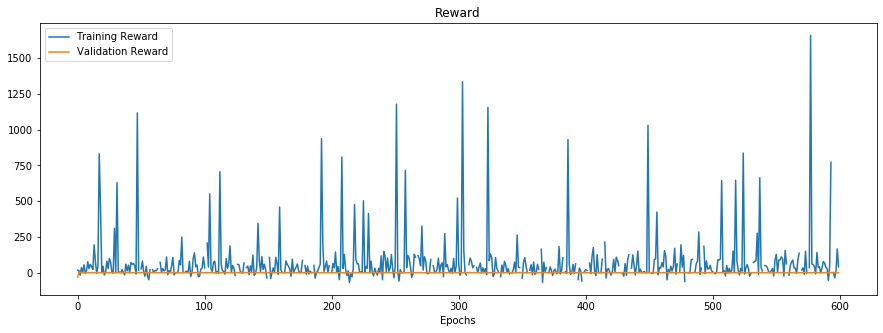

In [4]:
#Training
coloredlogs.install(level='DEBUG')
switch_k_backend_device() #switches to CPU (acc. to author faster than GPU)


if df2_train is not None:
    agent = Agent(window_size*2, pretrained=False, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=False, model_name=model_name)



reslist_t =[] # Train Reward for plotting
reslist_v = [] # Val Reward for plotting


for i in range(1, ep_count + 1): 
    #shuffle columns of training data
    cols = df_train.columns.values
    np.random.shuffle(cols)
    df_train_s = df_train[cols]
    print(df_train_s.head())

    #print(cols)

    for column in df_train_s:
        #create list
        df_train_list = list(df_train_s[column])
        df_val_list = list(df_val[column])

        #dft = df_test.rename(columns={column: 'actual'})
        initial_offset = df_train_list[1] - df_train_list[0]
                
        train_result = train_model(agent, i, df_train_list, df2_train_list, ep_count=ep_count,
                                batch_size=batch_size, window_size=window_size)
        val_result, _ = evaluate_model(agent, df_val_list, df2_val_list, window_size, debug)
        show_train_result(train_result, val_result, initial_offset)
      
        reslist_t.append(train_result[2]) # append reward of training
        reslist_v.append(val_result)
        
# Plotting Training History  
plt.figure(figsize = (15,5))
plt.plot(reslist_t, label = "Training Reward");
plt.plot(reslist_v, label = "Validation Reward");
plt.title("Reward")
plt.xlabel("Epochs")
plt.legend()
plt.show()



## Visualization of actions taken by Trading Bot

In [5]:
def visualize(df, history):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    #alt.Chart(df.reset_index()).mark_line().encode(x='index')
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df.reset_index()).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='Date:T', #'date:T'
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df.reset_index()).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
        #color=alt.Color('action', scale=alt.Scale(range=['blue', 'red']))
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title="your stock").properties(height=300, width=1000)
    
    return chart

## Plotting the evaluation actions

## Testing the Model
__Select correct model for Testing! (test model not linked to trained model)__

### Load different types of stocks in model:
 - Growth: Adobe (ADBE), Apple (AAPL)
 - Cyclical: Royal Caribbean (RCL)
 - Slow and low dividend: Costco (COST)
 - Turnaround: A&F (ANF)
 - Other: Gold
 
### Load generated data
  - Sin function
  - Random Data
 
 

I1006 11:31:31.831177 17276 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-10-06 11:31:31 PC-Stefan urllib3.connectionpool[17272] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I1006 11:31:32.210264 17276 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1451617200&period2=1570413599&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-06 11:31:32 PC-Stefan urllib3.connectionpool[17272] DEBUG https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1451617200&period2=1570413599&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I1006 11:31:32.836441 17276 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1451617200&period2=1570413599&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-06 11:31:32 PC-Stefan urllib3.connectionpool[17272] DEBUG https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1451617200&perio

<Figure size 432x288 with 0 Axes>

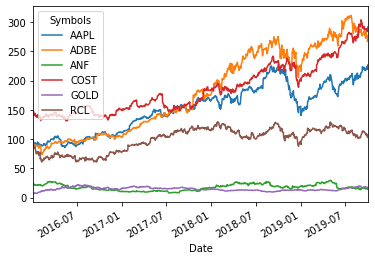

In [6]:
# Loading Test Data
# Setting Start and Enddate for Validation


start_test = datetime.datetime(2016, 1, 1)
end_test = datetime.datetime.now()

# Load Test Data

# Load several stocks
df_test = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF', 'GOLD'],'yahoo',
                               start=start_test, 
                               end=end_test)['Adj Close']

#Add random column for testing
#df_test['random']=np.random.randint(1,100,df_test.shape[0])
#df_test['sine']=50+50*np.sin(np.linspace(1,100,df_test.shape[0]))

# define second data input
df2_test = web.DataReader('GOLD','yahoo',
                               start=start_test, end=end_test)

# Convert df2_test to list
df2_test_list = list(df2_test['Adj Close'])


plt.figure();
df_test.plot();


In [9]:
# Loop over all Models and test them
# If window size does not fit, pass and try next model



for models in os.listdir("models/"):

    
    #model_name = 'model_w15v2_40'
    model_name = models
    
    # Init Model
    window_size = 30

    try: 
        # Initialize Agent
        if df2_test_list is not None:
            agent = Agent(window_size*2, pretrained=True, model_name=model_name)
        else:
            agent = Agent(window_size, pretrained=True, model_name=model_name)

        sum = 0
        # Loop over stocks
        for column in df_test:
            #print(column)
            #rename feature column name
            df_test_list = list(df_test[column])
            dft = df_test.rename(columns={column: 'actual'})
            initial_offset = df_test_list[1] - df_test_list[0]
            val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
            show_eval_result(model_name, val_result, initial_offset);
            chart = visualize(dft, history)
            sum = sum+val_result
            #print("Earnings of Model: ", model_name, " is: ", val_result)
            #chart.display()
        print("Sum of all earnings: ", model_name, " is: ", sum)
    except: 
        print(models, "wrong windowsize")
        pass

model_Fav1 wrong windowsize
model_GOOGL_10 wrong windowsize
model_GOOGL_20 wrong windowsize
model_GOOGL_30 wrong windowsize
model_GOOGL_40 wrong windowsize
model_GOOGL_50 wrong windowsize
model_Stefan2_10 wrong windowsize
model_Stefan2_20 wrong windowsize
model_Stefan2_30 wrong windowsize
model_Stefan2_40 wrong windowsize
model_Stefan2_50 wrong windowsize
model_Stefan_10 wrong windowsize
model_Stefan_20 wrong windowsize
model_w15v1_10 wrong windowsize
model_w15v1_20 wrong windowsize
model_w15v1_30 wrong windowsize
model_w15v1_40 wrong windowsize
model_w15v1_50 wrong windowsize
model_w15v1_60 wrong windowsize


I1006 11:46:02.882945 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:02 PC-Stefan root[17272] INFO model_w15v2_10: USELESS

I1006 11:46:04.145339 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:04 PC-Stefan root[17272] INFO model_w15v2_10: USELESS

I1006 11:46:05.419535 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:05 PC-Stefan root[17272] INFO model_w15v2_10: USELESS

I1006 11:46:06.682891 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:06 PC-Stefan root[17272] INFO model_w15v2_10: USELESS

I1006 11:46:07.970945 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:07 PC-Stefan root[17272] INFO model_w15v2_10: USELESS

I1006 11:46:09.278850 17276 evaluate.py:109] model_w15v2_10: USELESS

2019-10-06 11:46:09 PC-Stefan root[17272] INFO model_w15v2_10: USELESS



Sum of all earnings:  model_w15v2_10  is:  0


I1006 11:46:19.794737 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:19 PC-Stefan root[17272] INFO model_w15v2_100: USELESS

I1006 11:46:21.022080 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:21 PC-Stefan root[17272] INFO model_w15v2_100: USELESS

I1006 11:46:22.249224 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:22 PC-Stefan root[17272] INFO model_w15v2_100: USELESS

I1006 11:46:23.454583 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:23 PC-Stefan root[17272] INFO model_w15v2_100: USELESS

I1006 11:46:24.658952 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:24 PC-Stefan root[17272] INFO model_w15v2_100: USELESS

I1006 11:46:25.998397 17276 evaluate.py:109] model_w15v2_100: USELESS

2019-10-06 11:46:25 PC-Stefan root[17272] INFO model_w15v2_100: USELESS



Sum of all earnings:  model_w15v2_100  is:  0


I1006 11:46:36.817969 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:36 PC-Stefan root[17272] INFO model_w15v2_20: USELESS

I1006 11:46:38.149608 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:38 PC-Stefan root[17272] INFO model_w15v2_20: USELESS

I1006 11:46:39.496613 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:39 PC-Stefan root[17272] INFO model_w15v2_20: USELESS

I1006 11:46:40.792350 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:40 PC-Stefan root[17272] INFO model_w15v2_20: USELESS

I1006 11:46:42.219919 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:42 PC-Stefan root[17272] INFO model_w15v2_20: USELESS

I1006 11:46:43.497670 17276 evaluate.py:109] model_w15v2_20: USELESS

2019-10-06 11:46:43 PC-Stefan root[17272] INFO model_w15v2_20: USELESS



Sum of all earnings:  model_w15v2_20  is:  0


I1006 11:46:54.586050 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:46:54 PC-Stefan root[17272] INFO model_w15v2_30: USELESS

I1006 11:46:55.913046 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:46:55 PC-Stefan root[17272] INFO model_w15v2_30: USELESS

I1006 11:46:57.263982 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:46:57 PC-Stefan root[17272] INFO model_w15v2_30: USELESS

I1006 11:46:58.566063 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:46:58 PC-Stefan root[17272] INFO model_w15v2_30: USELESS

I1006 11:46:59.824696 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:46:59 PC-Stefan root[17272] INFO model_w15v2_30: USELESS

I1006 11:47:01.309096 17276 evaluate.py:109] model_w15v2_30: USELESS

2019-10-06 11:47:01 PC-Stefan root[17272] INFO model_w15v2_30: USELESS



Sum of all earnings:  model_w15v2_30  is:  0
model_w15v2_30 (2) wrong windowsize
model_w15v2_30_10 wrong windowsize
model_w15v2_30_20 wrong windowsize
model_w15v2_30_30 wrong windowsize


I1006 11:47:47.478143 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:47 PC-Stefan root[17272] INFO model_w15v2_40: USELESS

I1006 11:47:48.846891 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:48 PC-Stefan root[17272] INFO model_w15v2_40: USELESS

I1006 11:47:50.236190 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:50 PC-Stefan root[17272] INFO model_w15v2_40: USELESS

I1006 11:47:51.614856 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:51 PC-Stefan root[17272] INFO model_w15v2_40: USELESS

I1006 11:47:52.984392 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:52 PC-Stefan root[17272] INFO model_w15v2_40: USELESS

I1006 11:47:54.337846 17276 evaluate.py:109] model_w15v2_40: USELESS

2019-10-06 11:47:54 PC-Stefan root[17272] INFO model_w15v2_40: USELESS



Sum of all earnings:  model_w15v2_40  is:  0


I1006 11:48:06.054959 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:06 PC-Stefan root[17272] INFO model_w15v2_50: USELESS

I1006 11:48:07.384588 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:07 PC-Stefan root[17272] INFO model_w15v2_50: USELESS

I1006 11:48:08.716583 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:08 PC-Stefan root[17272] INFO model_w15v2_50: USELESS

I1006 11:48:10.034422 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:10 PC-Stefan root[17272] INFO model_w15v2_50: USELESS

I1006 11:48:11.374975 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:11 PC-Stefan root[17272] INFO model_w15v2_50: USELESS

I1006 11:48:12.733618 17276 evaluate.py:109] model_w15v2_50: USELESS

2019-10-06 11:48:12 PC-Stefan root[17272] INFO model_w15v2_50: USELESS



Sum of all earnings:  model_w15v2_50  is:  0


I1006 11:48:24.700044 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:24 PC-Stefan root[17272] INFO model_w15v2_60: USELESS

I1006 11:48:26.122358 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:26 PC-Stefan root[17272] INFO model_w15v2_60: USELESS

I1006 11:48:27.549022 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:27 PC-Stefan root[17272] INFO model_w15v2_60: USELESS

I1006 11:48:28.986337 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:28 PC-Stefan root[17272] INFO model_w15v2_60: USELESS

I1006 11:48:30.400542 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:30 PC-Stefan root[17272] INFO model_w15v2_60: USELESS

I1006 11:48:31.799678 17276 evaluate.py:109] model_w15v2_60: USELESS

2019-10-06 11:48:31 PC-Stefan root[17272] INFO model_w15v2_60: USELESS



Sum of all earnings:  model_w15v2_60  is:  0


I1006 11:48:43.933441 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:43 PC-Stefan root[17272] INFO model_w15v2_70: USELESS

I1006 11:48:45.372237 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:45 PC-Stefan root[17272] INFO model_w15v2_70: USELESS

I1006 11:48:46.812010 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:46 PC-Stefan root[17272] INFO model_w15v2_70: USELESS

I1006 11:48:48.212803 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:48 PC-Stefan root[17272] INFO model_w15v2_70: USELESS

I1006 11:48:49.645201 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:49 PC-Stefan root[17272] INFO model_w15v2_70: USELESS

I1006 11:48:51.051790 17276 evaluate.py:109] model_w15v2_70: USELESS

2019-10-06 11:48:51 PC-Stefan root[17272] INFO model_w15v2_70: USELESS



Sum of all earnings:  model_w15v2_70  is:  0


I1006 11:49:03.447204 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:03 PC-Stefan root[17272] INFO model_w15v2_80: USELESS

I1006 11:49:04.926289 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:04 PC-Stefan root[17272] INFO model_w15v2_80: USELESS

I1006 11:49:06.378671 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:06 PC-Stefan root[17272] INFO model_w15v2_80: USELESS

I1006 11:49:07.806455 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:07 PC-Stefan root[17272] INFO model_w15v2_80: USELESS

I1006 11:49:09.237435 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:09 PC-Stefan root[17272] INFO model_w15v2_80: USELESS

I1006 11:49:10.693953 17276 evaluate.py:109] model_w15v2_80: USELESS

2019-10-06 11:49:10 PC-Stefan root[17272] INFO model_w15v2_80: USELESS



Sum of all earnings:  model_w15v2_80  is:  0


I1006 11:49:23.192370 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:23 PC-Stefan root[17272] INFO model_w15v2_90: USELESS

I1006 11:49:24.702626 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:24 PC-Stefan root[17272] INFO model_w15v2_90: USELESS

I1006 11:49:26.202903 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:26 PC-Stefan root[17272] INFO model_w15v2_90: USELESS

I1006 11:49:27.693699 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:27 PC-Stefan root[17272] INFO model_w15v2_90: USELESS

I1006 11:49:29.201604 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:29 PC-Stefan root[17272] INFO model_w15v2_90: USELESS

I1006 11:49:30.702186 17276 evaluate.py:109] model_w15v2_90: USELESS

2019-10-06 11:49:30 PC-Stefan root[17272] INFO model_w15v2_90: USELESS



Sum of all earnings:  model_w15v2_90  is:  0
model_w20v1_10 wrong windowsize
model_w20v1_20 wrong windowsize
model_w20v1_30 wrong windowsize
model_w20v1_40 wrong windowsize
model_w20v1_50 wrong windowsize
model_w20v1_60 wrong windowsize


I1006 11:50:44.246160 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:44 PC-Stefan root[17272] INFO model_w30v1_10: USELESS

I1006 11:50:45.808163 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:45 PC-Stefan root[17272] INFO model_w30v1_10: USELESS

I1006 11:50:47.342364 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:47 PC-Stefan root[17272] INFO model_w30v1_10: USELESS

I1006 11:50:48.895770 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:48 PC-Stefan root[17272] INFO model_w30v1_10: USELESS

I1006 11:50:50.442423 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:50 PC-Stefan root[17272] INFO model_w30v1_10: USELESS

I1006 11:50:52.035662 17276 evaluate.py:109] model_w30v1_10: USELESS

2019-10-06 11:50:52 PC-Stefan root[17272] INFO model_w30v1_10: USELESS



Sum of all earnings:  model_w30v1_10  is:  0


I1006 11:51:05.841184 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:05 PC-Stefan root[17272] INFO model_w30v1_100: USELESS

I1006 11:51:07.383544 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:07 PC-Stefan root[17272] INFO model_w30v1_100: USELESS

I1006 11:51:08.908035 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:08 PC-Stefan root[17272] INFO model_w30v1_100: USELESS

I1006 11:51:10.428547 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:10 PC-Stefan root[17272] INFO model_w30v1_100: USELESS

I1006 11:51:11.926443 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:11 PC-Stefan root[17272] INFO model_w30v1_100: USELESS

I1006 11:51:13.444489 17276 evaluate.py:109] model_w30v1_100: USELESS

2019-10-06 11:51:13 PC-Stefan root[17272] INFO model_w30v1_100: USELESS



Sum of all earnings:  model_w30v1_100  is:  0


I1006 11:51:27.382279 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:27 PC-Stefan root[17272] INFO model_w30v1_20: USELESS

I1006 11:51:28.933941 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:28 PC-Stefan root[17272] INFO model_w30v1_20: USELESS

I1006 11:51:30.518674 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:30 PC-Stefan root[17272] INFO model_w30v1_20: USELESS

I1006 11:51:32.076067 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:32 PC-Stefan root[17272] INFO model_w30v1_20: USELESS

I1006 11:51:33.585278 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:33 PC-Stefan root[17272] INFO model_w30v1_20: USELESS

I1006 11:51:35.118616 17276 evaluate.py:109] model_w30v1_20: USELESS

2019-10-06 11:51:35 PC-Stefan root[17272] INFO model_w30v1_20: USELESS



Sum of all earnings:  model_w30v1_20  is:  0


I1006 11:51:49.234496 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:49 PC-Stefan root[17272] INFO model_w30v1_30: USELESS

I1006 11:51:50.863133 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:50 PC-Stefan root[17272] INFO model_w30v1_30: USELESS

I1006 11:51:52.483540 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:52 PC-Stefan root[17272] INFO model_w30v1_30: USELESS

I1006 11:51:54.136216 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:54 PC-Stefan root[17272] INFO model_w30v1_30: USELESS

I1006 11:51:55.751487 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:55 PC-Stefan root[17272] INFO model_w30v1_30: USELESS

I1006 11:51:57.344959 17276 evaluate.py:109] model_w30v1_30: USELESS

2019-10-06 11:51:57 PC-Stefan root[17272] INFO model_w30v1_30: USELESS



Sum of all earnings:  model_w30v1_30  is:  0


I1006 11:52:11.650310 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:11 PC-Stefan root[17272] INFO model_w30v1_40: USELESS

I1006 11:52:13.207794 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:13 PC-Stefan root[17272] INFO model_w30v1_40: USELESS

I1006 11:52:14.797126 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:14 PC-Stefan root[17272] INFO model_w30v1_40: USELESS

I1006 11:52:16.389634 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:16 PC-Stefan root[17272] INFO model_w30v1_40: USELESS

I1006 11:52:17.988302 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:17 PC-Stefan root[17272] INFO model_w30v1_40: USELESS

I1006 11:52:19.542844 17276 evaluate.py:109] model_w30v1_40: USELESS

2019-10-06 11:52:19 PC-Stefan root[17272] INFO model_w30v1_40: USELESS



Sum of all earnings:  model_w30v1_40  is:  0


I1006 11:52:34.111047 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:34 PC-Stefan root[17272] INFO model_w30v1_50: USELESS

I1006 11:52:35.807367 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:35 PC-Stefan root[17272] INFO model_w30v1_50: USELESS

I1006 11:52:37.473721 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:37 PC-Stefan root[17272] INFO model_w30v1_50: USELESS

I1006 11:52:39.142936 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:39 PC-Stefan root[17272] INFO model_w30v1_50: USELESS

I1006 11:52:40.855865 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:40 PC-Stefan root[17272] INFO model_w30v1_50: USELESS

I1006 11:52:42.561292 17276 evaluate.py:109] model_w30v1_50: USELESS

2019-10-06 11:52:42 PC-Stefan root[17272] INFO model_w30v1_50: USELESS



Sum of all earnings:  model_w30v1_50  is:  0


I1006 11:52:57.170469 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:52:57 PC-Stefan root[17272] INFO model_w30v1_60: USELESS

I1006 11:52:58.758309 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:52:58 PC-Stefan root[17272] INFO model_w30v1_60: USELESS

I1006 11:53:00.344612 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:53:00 PC-Stefan root[17272] INFO model_w30v1_60: USELESS

I1006 11:53:01.907623 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:53:01 PC-Stefan root[17272] INFO model_w30v1_60: USELESS

I1006 11:53:03.474255 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:53:03 PC-Stefan root[17272] INFO model_w30v1_60: USELESS

I1006 11:53:05.082539 17276 evaluate.py:109] model_w30v1_60: USELESS

2019-10-06 11:53:05 PC-Stefan root[17272] INFO model_w30v1_60: USELESS



Sum of all earnings:  model_w30v1_60  is:  0


I1006 11:53:19.722109 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:19 PC-Stefan root[17272] INFO model_w30v1_70: USELESS

I1006 11:53:21.370736 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:21 PC-Stefan root[17272] INFO model_w30v1_70: USELESS

I1006 11:53:23.047189 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:23 PC-Stefan root[17272] INFO model_w30v1_70: USELESS

I1006 11:53:24.632751 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:24 PC-Stefan root[17272] INFO model_w30v1_70: USELESS

I1006 11:53:26.293040 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:26 PC-Stefan root[17272] INFO model_w30v1_70: USELESS

I1006 11:53:27.900101 17276 evaluate.py:109] model_w30v1_70: USELESS

2019-10-06 11:53:27 PC-Stefan root[17272] INFO model_w30v1_70: USELESS



Sum of all earnings:  model_w30v1_70  is:  0


I1006 11:53:42.756931 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:42 PC-Stefan root[17272] INFO model_w30v1_80: USELESS

I1006 11:53:44.485982 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:44 PC-Stefan root[17272] INFO model_w30v1_80: USELESS

I1006 11:53:46.227357 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:46 PC-Stefan root[17272] INFO model_w30v1_80: USELESS

I1006 11:53:47.993624 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:47 PC-Stefan root[17272] INFO model_w30v1_80: USELESS

I1006 11:53:49.699558 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:49 PC-Stefan root[17272] INFO model_w30v1_80: USELESS

I1006 11:53:51.410549 17276 evaluate.py:109] model_w30v1_80: USELESS

2019-10-06 11:53:51 PC-Stefan root[17272] INFO model_w30v1_80: USELESS



Sum of all earnings:  model_w30v1_80  is:  0


I1006 11:54:06.572834 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:06 PC-Stefan root[17272] INFO model_w30v1_90: USELESS

I1006 11:54:08.271306 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:08 PC-Stefan root[17272] INFO model_w30v1_90: USELESS

I1006 11:54:10.020229 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:10 PC-Stefan root[17272] INFO model_w30v1_90: USELESS

I1006 11:54:11.723356 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:11 PC-Stefan root[17272] INFO model_w30v1_90: USELESS

I1006 11:54:13.421291 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:13 PC-Stefan root[17272] INFO model_w30v1_90: USELESS

I1006 11:54:15.096858 17276 evaluate.py:109] model_w30v1_90: USELESS

2019-10-06 11:54:15 PC-Stefan root[17272] INFO model_w30v1_90: USELESS



Sum of all earnings:  model_w30v1_90  is:  0


In [8]:
# Test 1 model
    
#model_name = 'model_w15v2_40' model_Stefan_10
model_name = "model_w15v2_30"

# Init Model
window_size = 15


# Initialize Agent
if df2_test_list is not None:
    agent = Agent(window_size*2, pretrained=True, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=True, model_name=model_name)

sum = 0
# Loop over stocks
for column in df_test:
    #print(column)
    #rename feature column name
    df_test_list = list(df_test[column])
    dft = df_test.rename(columns={column: 'actual'})
    initial_offset = df_test_list[1] - df_test_list[0]
    val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
    show_eval_result(model_name, val_result, initial_offset);
    chart = visualize(dft, history)
    sum = sum+val_result
    print("Earnings of : ", column, " is: ", val_result)
    chart.display()
print("Sum of all earnings: ", model_name, " is: ", sum)


ValueError: Error when checking input: expected dense_11_input to have shape (60,) but got array with shape (30,)

In [ ]:
dft.head(200)